In [1]:
%pip install polars
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import polars as pl



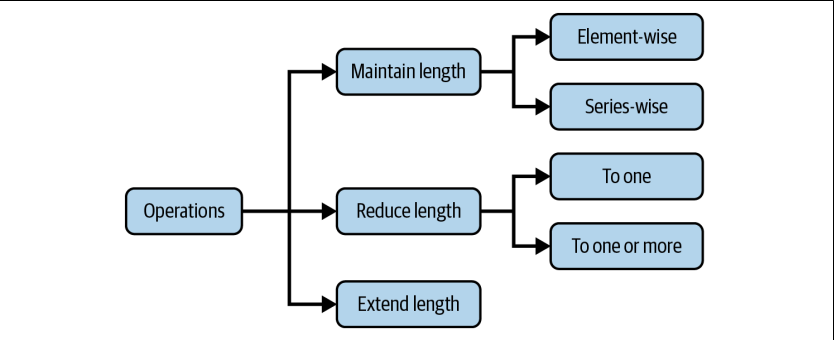

In [4]:
import base64

with open("/workspaces/python-polars-the-definitive-guide/Screenshots/17.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
    
print(f'![screenshot](data:image/png;base64,{encoded_string})')

# BEGIN

# Chapter 1: Introducing Polars

In [8]:
! wc -l data/citibike/202403-citibike-tripdata_3.csv

663296 data/citibike/202403-citibike-tripdata_3.csv


In [9]:
! head -n 6 data/citibike/202403-citibike-tripdata_3.csv

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
739F9ACBB2229887,electric_bike,2024-03-25 16:59:04.459,2024-03-25 17:05:32.885,18 St & 27 Ave,7062.07,21 Ave & Shore Blvd,7342.01,40.772768286288304,-73.92743647098541,40.783956,-73.916894,member
9B8B925918026FE8,classic_bike,2024-03-27 19:42:00.602,2024-03-27 20:14:56.040,W 74 St & Columbus Ave,7230.10,Columbus Ave & W 72 St,7175.05,40.7785669,-73.97754961,40.7770575,-73.97898475,member
B72C9122D6B99271,electric_bike,2024-03-22 10:01:51.759,2024-03-22 10:06:08.497,20 Ave & 42 St,7163.07,23 Ave & 31 St,7082.08,40.775415,-73.900063,40.77423301703027,-73.91274864321404,member
8C6881F9A10BD0A4,classic_bike,2024-03-19 17:27:15.692,2024-03-19 17:39:51.500,20 Ave & 42 St,7163.07,28 Ave & 44 St,6879.04,40.775415,-73.900063,40.76408932350688,-73.91065120697021,casual
CC5253575EF49E63,electric_bike,2024-03-24 09:38:16.550,2024-03-24 09:5

## ETL the data
### Extract Transform Load 

### Extract

In [2]:
try:
    trips = pl.read_csv("data/citibike/202403-citibike-tripdata_3.csv",try_parse_dates=True)
except Exception as e:
    print(e)

could not parse `JC038` as dtype `f64` at column 'end_station_id' (column number 8)

The current offset in the file is 317626 bytes.

You might want to try:
- increasing `infer_schema_length` (e.g. `infer_schema_length=10000`),
- specifying correct dtype with the `schema_overrides` argument
- setting `ignore_errors` to `True`,
- adding `JC038` to the `null_values` list.

Original error: ```invalid primitive value found during CSV parsing```


polars read_csv with "end_station"

In [28]:
trips = pl.read_csv("data/citibike/202403-citibike-tripdata_3.csv",
try_parse_dates=True,
schema_overrides={
"start_station_id":pl.String,
"end_station_id":pl.String,
},
).sort("started_at")

trips.height, len(trips)

(663295, 663295)

In [4]:
%%time
trips.height

CPU times: user 7 μs, sys: 2 μs, total: 9 μs
Wall time: 13.6 μs


663295

In [5]:
%%time
len(trips)

CPU times: user 0 ns, sys: 12 μs, total: 12 μs
Wall time: 15.3 μs


663295

In [23]:
print(trips[:,:4])

shape: (663_295, 4)
┌──────────────────┬───────────────┬─────────────────────────┬─────────────────────────┐
│ ride_id          ┆ rideable_type ┆ started_at              ┆ ended_at                │
│ ---              ┆ ---           ┆ ---                     ┆ ---                     │
│ str              ┆ str           ┆ datetime[μs]            ┆ datetime[μs]            │
╞══════════════════╪═══════════════╪═════════════════════════╪═════════════════════════╡
│ 52974AA955B77FD3 ┆ electric_bike ┆ 2024-03-14 20:00:00.099 ┆ 2024-03-14 20:03:21.711 │
│ DE94DFC876960A4E ┆ classic_bike  ┆ 2024-03-14 20:00:00.931 ┆ 2024-03-14 20:10:43.662 │
│ C51F717D55C821F1 ┆ electric_bike ┆ 2024-03-14 20:00:03.850 ┆ 2024-03-14 20:10:32.170 │
│ FEEBE2FA2CA02D7E ┆ classic_bike  ┆ 2024-03-14 20:00:05.535 ┆ 2024-03-14 20:06:27.142 │
│ FC953940C57C2A35 ┆ electric_bike ┆ 2024-03-14 20:00:05.790 ┆ 2024-03-14 20:12:03.063 │
│ …                ┆ …             ┆ …                       ┆ …                       │
│

In [24]:
print(trips[:,4:8])

shape: (663_295, 4)
┌──────────────────────────┬──────────────────┬─────────────────────────────┬────────────────┐
│ start_station_name       ┆ start_station_id ┆ end_station_name            ┆ end_station_id │
│ ---                      ┆ ---              ┆ ---                         ┆ ---            │
│ str                      ┆ str              ┆ str                         ┆ str            │
╞══════════════════════════╪══════════════════╪═════════════════════════════╪════════════════╡
│ MacDougal St & Prince St ┆ 5687.04          ┆ Cleveland Pl & Spring St    ┆ 5492.05        │
│ 10 Ave & W 28 St         ┆ 6459.04          ┆ 8 Ave & W 16 St             ┆ 6072.11        │
│ Broadway & W 38 St       ┆ 6560.15          ┆ E 53 St & Lexington Ave     ┆ 6617.09        │
│ 8 Ave & W 16 St          ┆ 6072.11          ┆ W 26 St & 10 Ave            ┆ 6382.05        │
│ Greenwich St & Rector St ┆ 5073.07          ┆ Walker St & Baxter St       ┆ 5351.07        │
│ …                        ┆ …

In [25]:
print(trips[:,8:])

shape: (663_295, 5)
┌───────────┬────────────┬───────────┬────────────┬───────────────┐
│ start_lat ┆ start_lng  ┆ end_lat   ┆ end_lng    ┆ member_casual │
│ ---       ┆ ---        ┆ ---       ┆ ---        ┆ ---           │
│ f64       ┆ f64        ┆ f64       ┆ f64        ┆ str           │
╞═══════════╪════════════╪═══════════╪════════════╪═══════════════╡
│ 40.727103 ┆ -74.002971 ┆ 40.722104 ┆ -73.997249 ┆ member        │
│ 40.750664 ┆ -74.001768 ┆ 40.740983 ┆ -74.001702 ┆ member        │
│ 40.752973 ┆ -73.987349 ┆ 40.758281 ┆ -73.970694 ┆ casual        │
│ 40.740983 ┆ -74.001702 ┆ 40.749718 ┆ -74.00295  ┆ member        │
│ 40.708066 ┆ -74.01356  ┆ 40.717411 ┆ -73.999573 ┆ member        │
│ …         ┆ …          ┆ …         ┆ …          ┆ …             │
│ 40.67897  ┆ -73.978553 ┆ 40.679331 ┆ -73.975195 ┆ member        │
│ 40.725029 ┆ -73.990697 ┆ 40.723077 ┆ -73.985836 ┆ member        │
│ 40.761227 ┆ -73.96094  ┆ 40.759125 ┆ -73.962658 ┆ member        │
│ 40.729848 ┆ -73.974552 ┆ 4

In [6]:
! python -m json.tool data/citibike/nyc-neighborhoods.geojson

{
    "type": "FeatureCollection",
    "crs": {
        "type": "name",
        "properties": {
            "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
        }
    },
    "features": [
        {
            "type": "Feature",
            "properties": {
                "neighborhood": "Allerton",
                "boroughCode": "2",
                "borough": "Bronx",
                "X.id": "http://nyc.pediacities.com/Resource/Neighborhood/Allerton"
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [
                            -73.84859700000018,
                            40.871670000000115
                        ],
                        [
                            -73.84582253683678,
                            40.870239076236174
                        ],
                        [
                            -73.85455918463374,
                            40.85995383576425
 

Let's Read the Json

In [11]:
neighborhoods = (pl.read_json("data/citibike/nyc-neighborhoods.geojson")
        .select("features").explode("features").unnest("features")
        .unnest("properties").select("neighborhood","borough","geometry")
        .unnest("geometry")
        .with_columns(polygon=pl.col("coordinates").list.first())
        .select("neighborhood","borough", "polygon")
        .filter(pl.col("borough") != "Staten Island")
        .sort("neighborhood")
         
        )
neighborhoods

shape: (258, 3)
┌─────────────────┬──────────┬─────────────────────────────────┐
│ neighborhood    ┆ borough  ┆ polygon                         │
│ ---             ┆ ---      ┆ ---                             │
│ str             ┆ str      ┆ list[list[f64]]                 │
╞═════════════════╪══════════╪═════════════════════════════════╡
│ Allerton        ┆ Bronx    ┆ [[-73.848597, 40.87167], [-73.… │
│ Alley Pond Park ┆ Queens   ┆ [[-73.743333, 40.738883], [-73… │
│ Arverne         ┆ Queens   ┆ [[-73.789535, 40.599972], [-73… │
│ Astoria         ┆ Queens   ┆ [[-73.901603, 40.76777], [-73.… │
│ Bath Beach      ┆ Brooklyn ┆ [[-73.99381, 40.60195], [-73.9… │
│ …               ┆ …        ┆ …                               │
│ Williamsburg    ┆ Brooklyn ┆ [[-73.957572, 40.725097], [-73… │
│ Windsor Terrace ┆ Brooklyn ┆ [[-73.980061, 40.660753], [-73… │
│ Woodhaven       ┆ Queens   ┆ [[-73.86233, 40.695962], [-73.… │
│ Woodlawn        ┆ Bronx    ┆ [[-73.859468, 40.900517], [-73… │
│ Woodside        ┆ Queens   ┆ [[-73.900866, 40.757674], [-73… │
└─────────────────┴──────────┴─────────────────────────────────┘

In [10]:
nb = pl.read_json("data/citibike/nyc-neighborhoods.geojson")
nb

shape: (1, 3)
┌───────────────────┬─────────────────────────────────┬─────────────────────────────────┐
│ type              ┆ crs                             ┆ features                        │
│ ---               ┆ ---                             ┆ ---                             │
│ str               ┆ struct[2]                       ┆ list[struct[3]]                 │
╞═══════════════════╪═════════════════════════════════╪═════════════════════════════════╡
│ FeatureCollection ┆ {"name",{"urn:ogc:def:crs:OGC:… ┆ [{"Feature",{"Allerton","2","B… │
└───────────────────┴─────────────────────────────────┴─────────────────────────────────┘

use (
    <br>.
    <br>.
    <br>.

) for better readilbity

In [14]:
neighborhoods_coords = (
    neighborhoods.with_row_index("id")
    .explode("polygon")
    .with_columns(
        lon=pl.col("polygon").list.first(),
        lat=pl.col("polygon").list.last()
    )
    .drop("polygon")
)
neighborhoods_coords

shape: (27_569, 5)
┌─────┬──────────────┬─────────┬────────────┬───────────┐
│ id  ┆ neighborhood ┆ borough ┆ lon        ┆ lat       │
│ --- ┆ ---          ┆ ---     ┆ ---        ┆ ---       │
│ u32 ┆ str          ┆ str     ┆ f64        ┆ f64       │
╞═════╪══════════════╪═════════╪════════════╪═══════════╡
│ 0   ┆ Allerton     ┆ Bronx   ┆ -73.848597 ┆ 40.87167  │
│ 0   ┆ Allerton     ┆ Bronx   ┆ -73.845823 ┆ 40.870239 │
│ 0   ┆ Allerton     ┆ Bronx   ┆ -73.854559 ┆ 40.859954 │
│ 0   ┆ Allerton     ┆ Bronx   ┆ -73.854665 ┆ 40.859586 │
│ 0   ┆ Allerton     ┆ Bronx   ┆ -73.856389 ┆ 40.857594 │
│ …   ┆ …            ┆ …       ┆ …          ┆ …         │
│ 257 ┆ Woodside     ┆ Queens  ┆ -73.910618 ┆ 40.755476 │
│ 257 ┆ Woodside     ┆ Queens  ┆ -73.90907  ┆ 40.757565 │
│ 257 ┆ Woodside     ┆ Queens  ┆ -73.907828 ┆ 40.756999 │
│ 257 ┆ Woodside     ┆ Queens  ┆ -73.90737  ┆ 40.756988 │
│ 257 ┆ Woodside     ┆ Queens  ┆ -73.900866 ┆ 40.757674 │
└─────┴──────────────┴─────────┴────────────┴───────────┘

In [16]:
stations = (
    trips.group_by(station=pl.col("start_station_name"))
    .agg(
        lon=pl.col("start_lng").median(),
        lat=pl.col("start_lat").median(),
    )
    .sort("station")
    .drop_nulls()
)
stations

shape: (2_126, 3)
┌──────────────────────────────┬────────────┬───────────┐
│ station                      ┆ lon        ┆ lat       │
│ ---                          ┆ ---        ┆ ---       │
│ str                          ┆ f64        ┆ f64       │
╞══════════════════════════════╪════════════╪═══════════╡
│ 1 Ave & E 110 St             ┆ -73.9383   ┆ 40.792327 │
│ 1 Ave & E 16 St              ┆ -73.981656 ┆ 40.732219 │
│ 1 Ave & E 18 St              ┆ -73.980544 ┆ 40.733812 │
│ 1 Ave & E 30 St              ┆ -73.975361 ┆ 40.741444 │
│ 1 Ave & E 38 St              ┆ -73.971822 ┆ 40.746202 │
│ …                            ┆ …          ┆ …         │
│ Wyckoff Ave & Stanhope St    ┆ -73.917775 ┆ 40.703545 │
│ Wyckoff St & 3 Ave           ┆ -73.982586 ┆ 40.682755 │
│ Wythe Ave & Metropolitan Ave ┆ -73.963198 ┆ 40.716887 │
│ Wythe Ave & N 13 St          ┆ -73.957021 ┆ 40.722767 │
│ Yankee Ferry Terminal        ┆ -74.016756 ┆ 40.687066 │
└──────────────────────────────┴────────────┴───────────┘

### Transform
How are we chaning the df
- It gets rid of the columns ride_id, start_station_id, and end_station_id,
because we don’t need them.
- It shortens the column names so that they’re easier to work with.
- It turns bike_type and rider_type into categories, which better reflects the data
types of these columns.
- It adds a new column called duration, which is based on the start and end times
of the bike trip.

In [40]:
trips_1 = pl.read_csv("data/citibike/202403-citibike-tripdata_1.csv",
try_parse_dates=True,
schema_overrides={
"start_station_id":pl.String,
"end_station_id":pl.String,
},
).sort("started_at")
trips_2 = pl.read_csv("data/citibike/202403-citibike-tripdata_2.csv",
try_parse_dates=True,
schema_overrides={
"start_station_id":pl.String,
"end_station_id":pl.String,
},
).sort("started_at")
trips_3 = pl.read_csv("data/citibike/202403-citibike-tripdata_3.csv",
try_parse_dates=True,
schema_overrides={
"start_station_id":pl.String,
"end_station_id":pl.String,
},
).sort("started_at")

In [41]:
trips = pl.concat([trips_1, trips_2, trips_3]) 

In [43]:
trips.height

2663295

In [42]:
trips.columns

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [44]:
trips = trips.select(
    bike_type=pl.col("rideable_type")
    .str.split("_")
    .list.get(0)
    .cast(pl.Categorical),
    rider_type=pl.col("member_casual").cast(pl.Categorical),
    datetime_start=pl.col("started_at"),
    datetime_end=pl.col("ended_at"),
    station_start=pl.col("start_station_name"),
    station_end=pl.col("end_station_name"),
    lon_start=pl.col("start_lng"),
    lat_start=pl.col("start_lat"),
    lon_end=pl.col("end_lng"),
    lat_end=pl.col("end_lat"),
).with_columns(
duration=(pl.col("datetime_end") - pl.col("datetime_start"))
)

In [45]:
trips.columns

['bike_type',
 'rider_type',
 'datetime_start',
 'datetime_end',
 'station_start',
 'station_end',
 'lon_start',
 'lat_start',
 'lon_end',
 'lat_end',
 'duration']

In [46]:
trips = (
    trips.drop_nulls()
    .filter(
        (pl.col("datetime_start") >= pl.date(2024,3,1))
        &(pl.col("datetime_end")< pl.date(2024, 4, 1))
    )
    .filter(
        ~(
            (pl.col("station_start") == pl.col("station_end"))
            &(pl.col("duration").dt.total_seconds() < 5*60)
        )
    )

)
trips.height

2638969

In [48]:
try:
    trips = trips.with_columns(
    distance=pl.concat_list("lon_start", "lat_start").geo.haversine_distance(
    pl.concat_list("lon_end", "lat_end")
    )
    / 1000
    )
except Exception as e:
    print(f"{e}. Also you need to install the geo plugin(it's in Rust lol)")

'Expr' object has no attribute 'geo'. Also you need to install the geo plugin(it's in Rust lol)


### Loading
The Data

In [1]:
! ls -1 data/citibike/*.parquet

data/citibike/trips-2024-03-01.parquet
data/citibike/trips-2024-03-02.parquet
data/citibike/trips-2024-03-03.parquet
data/citibike/trips-2024-03-04.parquet
data/citibike/trips-2024-03-05.parquet
data/citibike/trips-2024-03-06.parquet
data/citibike/trips-2024-03-07.parquet
data/citibike/trips-2024-03-08.parquet
data/citibike/trips-2024-03-09.parquet
data/citibike/trips-2024-03-10.parquet
data/citibike/trips-2024-03-11.parquet
data/citibike/trips-2024-03-12.parquet
data/citibike/trips-2024-03-13.parquet
data/citibike/trips-2024-03-14.parquet
data/citibike/trips-2024-03-15.parquet
data/citibike/trips-2024-03-16.parquet
data/citibike/trips-2024-03-17.parquet
data/citibike/trips-2024-03-18.parquet
data/citibike/trips-2024-03-19.parquet
data/citibike/trips-2024-03-20.parquet
data/citibike/trips-2024-03-21.parquet
data/citibike/trips-2024-03-22.parquet
data/citibike/trips-2024-03-23.parquet
data/citibike/trips-2024-03-24.parquet
data/citibike/trips-2024-03-25.parquet
data/citibike/trips-2024-

In [2]:
trips = pl.read_parquet("data/citibike/*.parquet")

In [3]:
trips.height

2638971

### Eager Vs Lazy API
- Eager is just doing it as we go, like pandas, but lazy api we give the steps and then polars optimizes the steps and executes it the way it sees fit

Using Eager and lazy together

In [7]:
trips = (
    pl.scan_csv("data/citibike/202403-citibike-tripdata_1.csv", #lazy api for pl.scan_csv()
    try_parse_dates=True,
    schema_overrides={
        "start_station_id":pl.String,
        "end_station_id":pl.String,
    },
)
.select(
bike_type=pl.col("rideable_type").str.split("_").list.get(0),
rider_type=pl.col("member_casual"),
datetime_start=pl.col("started_at"),
datetime_end=pl.col("ended_at"),
station_start=pl.col("start_station_name"),
station_end=pl.col("end_station_name"),
lon_start=pl.col("start_lng"),
lat_start=pl.col("start_lat"),
lon_end=pl.col("end_lng"),
lat_end=pl.col("end_lat"),
)
.with_columns(duration=(pl.col("datetime_end") - pl.col("datetime_start")))
.drop_nulls()
.filter(
~(
(pl.col("station_start") == pl.col("station_end"))
& (pl.col("duration").dt.total_seconds() < 5 * 60)
)
)
.collect() )
#turns lazyframe into dataframe

In [8]:
trips.height

989770

In [9]:
neighborhoods = (
pl.read_json("data/citibike/nyc-neighborhoods.geojson")
.lazy() #turns dataframe to lazyframe
.select("features")
.explode("features")
.unnest("features")
.unnest("properties")
.select("neighborhood", "borough", "geometry")
.unnest("geometry")
.with_columns(polygon=pl.col("coordinates").list.first())
.select("neighborhood", "borough", "polygon")
.sort("neighborhood")
.filter(pl.col("borough") != "Staten Island")
)

## Chapter 1 Review
- Some info on why polars is like fast and stuff. Also it does seem faster than pandas. uses the Apache arrow or built on it. Also consumes lesser energy apparently.
-ETL Showcase (Extract Transform Load) 
- pl.String, pl.Categorical, can also schema_overrides, while reading data
- .select .explode .unnest .with_columns also, with_columns("nameofnewcol = pl.col("old_col").dosomething()
- .cast(datatype) .select(newcol = pl.col("old_col)) . also can use .alias
- .filter .dropnulls .join .agg
- pl.write_csv, pl.write_paraquet 
- lazy vs eager api, mix of both as polars doesn't cache, so lazy api may sometimes make processing slower. So to cache it, sometimes you need to turn the lazy frames in dataframes with .collect
- you turn dataframes into lazy frames with df.lazy()....continue with data processing options

# Chapter 2: Getting Started

### Creating Random Data
to check out `pl.config)()`

In [5]:
import random
import string


def generate_random_string(length: int) -> str:
    return "".join(random.choice(string.ascii_letters) for i in range(length))

data = {}
for i in range(1, 11):
    data[f"column_{i}"] = [generate_random_string(50) for _ in range(5)]
df = pl.DataFrame(data)

df

shape: (5, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ column_1  ┆ column_2  ┆ column_3  ┆ column_4  ┆ … ┆ column_7  ┆ column_8  ┆ column_9  ┆ column_1 │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ 0        │
│ str       ┆ str       ┆ str       ┆ str       ┆   ┆ str       ┆ str       ┆ str       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ aeJWwLKqD ┆ oQbxRWmUJ ┆ nvytXAOMo ┆ QMziVISFe ┆ … ┆ TpfNiJukt ┆ PFDkDkFjo ┆ NvRScYQHI ┆ ntDEeCyc │
│ JuhWVOeiW ┆ ONdfnJeMH ┆ fdGpSIOxx ┆ txmPDiwfx ┆   ┆ iDIOBwrvH ┆ HoZrcjoah ┆ sgnZeSTwV ┆ xzssmwAZ │
│ ChNtafmNN ┆ GZlBKCloq ┆ wPNyYAtkQ ┆ ebzCqQNOK ┆   ┆ gDNWmIylA ┆ rEUuWGJDS ┆ IlfgmBLvO ┆ pKqvVRpi │
│ FSQ…      ┆ Gdt…      ┆ QxC…      ┆ gEK…      ┆   ┆ cto…      ┆ OJx…      ┆ pQn…      ┆ JwTrwx…  │
│ rRyvJAmQN ┆ kYvjRwYyT ┆ UYFezMaXo ┆ TNYywuxVe ┆ … ┆ KBYEhVfBs ┆ WDNqRkQdI ┆ FcerksuyR ┆ NwsdpVsg │
│ IVybqqgbg ┆ imMuYVNxg ┆ JGxOWDUhN ┆ DYVkWTeYp ┆   ┆ HWZCdoeNm ┆ DPeRXnbbS ┆ FwXDkaoHL ┆ kBgvLBHQ │
│ YLVmVCjgQ ┆ ttlDdYHzH ┆ xFmRlqXmU ┆ nuArIKBUJ ┆   ┆ tTIyWfTbC ┆ HIlonsHZE ┆ grMPyiNjJ ┆ bHoRUaMe │
│ xpg…      ┆ hCL…      ┆ bMC…      ┆ oQC…      ┆   ┆ aBd…      ┆ Aqe…      ┆ dog…      ┆ jIpOpj…  │
│ jyZfICWLz ┆ yqIoIWaMS ┆ pqPePWGvk ┆ VzGIjqSaI ┆ … ┆ bprgcFlQU ┆ eRoyxWMoo ┆ UcZEoFfvH ┆ yFRWFgpi │
│ QoDTZXTOj ┆ hXeJiBFMD ┆ BjnhrlewE ┆ ikwKRbcNK ┆   ┆ jiScaBThL ┆ bTyptJKmu ┆ sjEXcpSeP ┆ uCVJXGld │
│ oHscPPebP ┆ hRcFPTJOz ┆ zNWntDAFQ ┆ wssCtRsMR ┆   ┆ RSneKQZgH ┆ WzZsXJgxB ┆ KKXIXMgEi ┆ iBzfSHcs │
│ AoO…      ┆ CCV…      ┆ CRQ…      ┆ tJg…      ┆   ┆ leM…      ┆ TwY…      ┆ nzF…      ┆ loFOuy…  │
│ uPuiPDpLI ┆ pwTVGIqED ┆ xPaxsOTGS ┆ owOwPmAeH ┆ … ┆ ExJnfdDEe ┆ CJfdhILyH ┆ NmoEFNZIN ┆ moxZJJeM │
│ WdAdjbpBP ┆ UncpuVfnr ┆ jRVwwaGaD ┆ KHQiHpwdO ┆   ┆ AfKIEkmqt ┆ jkmneqgej ┆ YcKdBqJmg ┆ OOlZJLgy │
│ xhdlwEiKf ┆ ghdiXfiNg ┆ UBdpMjQao ┆ YdnZVKClL ┆   ┆ hlOWnxLSe ┆ AcBdgASfG ┆ aPtAZPlcV ┆ NNmmUwwY │
│ ItD…      ┆ vEi…      ┆ YtO…      ┆ gAU…      ┆   ┆ NVw…      ┆ txt…      ┆ Vpm…      ┆ cRXRvN…  │
│ xjbZJannd ┆ OjcaqwuPQ ┆ JiZyWgFSd ┆ ytgpnKLrl ┆ … ┆ RrZWEKsxN ┆ ZBGqSjiIr ┆ fVJmdjqbV ┆ RuPBcbdd │
│ AgvjbcKSb ┆ bbbnyWJQE ┆ MGFkOBNOV ┆ zTNprjPpa ┆   ┆ VaRvVGnWu ┆ VCRAfsUIw ┆ JVetfyuds ┆ GgOsdJWs │
│ yYJEyXpSE ┆ KIrYygiSu ┆ ElhDtxIxK ┆ BTTBnJhNr ┆   ┆ OhtNLRcGx ┆ ehKrrcllE ┆ uENKfkAGS ┆ zTuBpiZu │
│ Ukv…      ┆ FVI…      ┆ wEu…      ┆ QzQ…      ┆   ┆ naj…      ┆ ybR…      ┆ Qec…      ┆ WhKqsm…  │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [11]:
with pl.Config(tbl_cols = -1, fmt_str_lengths=6):
    print(df)

shape: (5, 10)
┌─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬────────┐
│ column… ┆ column… ┆ column… ┆ column… ┆ column… ┆ column… ┆ column… ┆ column… ┆ column… ┆ column │
│ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ …      │
│ str     ┆ str     ┆ str     ┆ str     ┆ str     ┆ str     ┆ str     ┆ str     ┆ str     ┆ ---    │
│         ┆         ┆         ┆         ┆         ┆         ┆         ┆         ┆         ┆ str    │
╞═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╡
│ aeJWwL… ┆ oQbxRW… ┆ nvytXA… ┆ QMziVI… ┆ YfWkiu… ┆ tLNazO… ┆ TpfNiJ… ┆ PFDkDk… ┆ NvRScY… ┆ ntDEeC │
│         ┆         ┆         ┆         ┆         ┆         ┆         ┆         ┆         ┆ …      │
│ rRyvJA… ┆ kYvjRw… ┆ UYFezM… ┆ TNYywu… ┆ Njduho… ┆ VdvcbB… ┆ KBYEhV… ┆ WDNqRk… ┆ Fcerks… ┆ NwsdpV │
│         ┆         ┆         ┆         ┆         ┆         ┆         ┆     

### Quick Rundown of Context Management

In [12]:
class UrContextManager:
    def __enter__(self):
        print("Entering context")

    def __exit__(self, type, value, traceback):
        print("Exiting Context")

with UrContextManager():
    print("Code here")

Entering context
Code here
Exiting Context


Two key methods under the hood, before and after whatever you want in between. Pretty Self explanatory

In [13]:
with open("data/fruit.csv", "r") as f:
    print(f.readline())

name,weight,color,is_round,origin



### Local Config using a decorator

In [18]:
@pl.Config(ascii_tables=True)
def write_DataFrame_to_stdout(df: pl.DataFrame) -> None:
    print(str(df))


write_DataFrame_to_stdout(df)

shape: (5, 10)
+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------+
| column_ | column_ | column_ | column_ | column_ | column_ | column_ | column_ | column_ | column |
| 1       | 2       | 3       | 4       | 5       | 6       | 7       | 8       | 9       | _10    |
| ---     | ---     | ---     | ---     | ---     | ---     | ---     | ---     | ---     | ---    |
| str     | str     | str     | str     | str     | str     | str     | str     | str     | str    |
+==================================================================================================+
| aeJWwLK | oQbxRWm | nvytXAO | QMziVIS | YfWkiuQ | tLNazOf | TpfNiJu | PFDkDkF | NvRScYQ | ntDEeC |
| qDJuhWV | UJONdfn | MofdGpS | FetxmPD | yJSevoQ | wRgJiuY | ktiDIOB | joHoZrc | HIsgnZe | ycxzss |
| OeiWChN | JeMHGZl | IOxxwPN | iwfxebz | FZcGrMs | jJRokLi | wrvHgDN | joahrEU | STwVIlf | mwAZpK |
| tafmNNF | BKCloqG | yYAtkQQ | CqQNOKg | OBTxXYf | IorBoZD | WmIylAc | uWGJ

Get verbose info 

In [ ]:
@pl.Config(verbose=True)
def func_to_debug(df: pl.DataFrame) -> None:
    pass

Things to Note:
- Big Datasets above >4.2B rows use `pip install polars-u64-idx` essentially 64 bit instead of std. 32 bit, or you can complie with `bigidx` feature
- AVX or Advanced Vector Extenstions, come standard with chips shipper after 2011 so no need for concern

# Chapter 3: Pandas to Polars

## Starting

In [3]:
! cat data/animals.csv

animal,class,habitat,diet,lifespan,status,features,weight
dolphin,mammal,oceans/rivers,carnivore,40,least concern,high intelligence,150
duck,bird,wetlands,omnivore,8,least concern,waterproof feathers,3
elephant,mammal,savannah,herbivore,60,endangered,large ears and trunk,8000
ibis,bird,wetlands,omnivore,16,least concern,"long, curved bill",1
impala,mammal,savannah,herbivore,12,least concern,"long, curved horns",70
kudu,mammal,savannah,herbivore,15,least concern,spiral horns,250
narwhal,mammal,arctic ocean,carnivore,40,near threatened,"long, spiral tusk",
panda,mammal,forests,herbivore,20,vulnerable,black and white coloration,100
polar bear,mammal,arctic,carnivore,25,vulnerable,thick fur and blubber,720
ray,fish,oceans,carnivore,20,"","flat, disc-shaped body",90


Both pandas and polars use DataFrames with are a bunch of Series(same type column typshii)

In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import polars as pl

In [6]:
%%timeit
animals_pd = pd.read_csv("data/animals.csv", sep=",", header=0)


1.39 ms ± 574 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%%timeit
animals_pl = pl.read_csv("data/animals.csv", separator=",", has_header=True)

218 μs ± 32.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
animals_pd = pd.read_csv("data/animals.csv", sep=",", header=0)
animals_pl = pl.read_csv("data/animals.csv", separator=",", has_header=True)

In [9]:
print(f"{type(animals_pd) = }")
print(f"{type(animals_pl) = }")

type(animals_pd) = <class 'pandas.DataFrame'>
type(animals_pl) = <class 'polars.dataframe.frame.DataFrame'>


In [10]:
animals_pd

animal   class        habitat       diet  lifespan           status  \
0     dolphin  mammal  oceans/rivers  carnivore        40    least concern   
1        duck    bird       wetlands   omnivore         8    least concern   
2    elephant  mammal       savannah  herbivore        60       endangered   
3        ibis    bird       wetlands   omnivore        16    least concern   
4      impala  mammal       savannah  herbivore        12    least concern   
5        kudu  mammal       savannah  herbivore        15    least concern   
6     narwhal  mammal   arctic ocean  carnivore        40  near threatened   
7       panda  mammal        forests  herbivore        20       vulnerable   
8  polar bear  mammal         arctic  carnivore        25       vulnerable   
9         ray    fish         oceans  carnivore        20              NaN   

                     features  weight  
0           high intelligence   150.0  
1         waterproof feathers     3.0  
2        large ears and trunk  8000.0  
3           long, curved bill     1.0  
4          long, curved horns    70.0  
5                spiral horns   250.0  
6           long, spiral tusk     NaN  
7  black and white coloration   100.0  
8       thick fur and blubber   720.0  
9      flat, disc-shaped body    90.0

In [11]:
animals_pl

shape: (10, 8)
┌────────────┬────────┬──────────────┬───────────┬──────────┬──────────────┬──────────────┬────────┐
│ animal     ┆ class  ┆ habitat      ┆ diet      ┆ lifespan ┆ status       ┆ features     ┆ weight │
│ ---        ┆ ---    ┆ ---          ┆ ---       ┆ ---      ┆ ---          ┆ ---          ┆ ---    │
│ str        ┆ str    ┆ str          ┆ str       ┆ i64      ┆ str          ┆ str          ┆ i64    │
╞════════════╪════════╪══════════════╪═══════════╪══════════╪══════════════╪══════════════╪════════╡
│ dolphin    ┆ mammal ┆ oceans/river ┆ carnivore ┆ 40       ┆ least        ┆ high         ┆ 150    │
│            ┆        ┆ s            ┆           ┆          ┆ concern      ┆ intelligence ┆        │
│ duck       ┆ bird   ┆ wetlands     ┆ omnivore  ┆ 8        ┆ least        ┆ waterproof   ┆ 3      │
│            ┆        ┆              ┆           ┆          ┆ concern      ┆ feathers     ┆        │
│ elephant   ┆ mammal ┆ savannah     ┆ herbivore ┆ 60       ┆ endangered   ┆ large ears   ┆ 8000   │
│            ┆        ┆              ┆           ┆          ┆              ┆ and trunk    ┆        │
│ ibis       ┆ bird   ┆ wetlands     ┆ omnivore  ┆ 16       ┆ least        ┆ long, curved ┆ 1      │
│            ┆        ┆              ┆           ┆          ┆ concern      ┆ bill         ┆        │
│ impala     ┆ mammal ┆ savannah     ┆ herbivore ┆ 12       ┆ least        ┆ long, curved ┆ 70     │
│            ┆        ┆              ┆           ┆          ┆ concern      ┆ horns        ┆        │
│ kudu       ┆ mammal ┆ savannah     ┆ herbivore ┆ 15       ┆ least        ┆ spiral horns ┆ 250    │
│            ┆        ┆              ┆           ┆          ┆ concern      ┆              ┆        │
│ narwhal    ┆ mammal ┆ arctic ocean ┆ carnivore ┆ 40       ┆ near         ┆ long, spiral ┆ null   │
│            ┆        ┆              ┆           ┆          ┆ threatened   ┆ tusk         ┆        │
│ panda      ┆ mammal ┆ forests      ┆ herbivore ┆ 20       ┆ vulnerable   ┆ black and    ┆ 100    │
│            ┆        ┆              ┆           ┆          ┆              ┆ white        ┆        │
│            ┆        ┆              ┆           ┆          ┆              ┆ coloration   ┆        │
│ polar bear ┆ mammal ┆ arctic       ┆ carnivore ┆ 25       ┆ vulnerable   ┆ thick fur    ┆ 720    │
│            ┆        ┆              ┆           ┆          ┆              ┆ and blubber  ┆        │
│ ray        ┆ fish   ┆ oceans       ┆ carnivore ┆ 20       ┆              ┆ flat,        ┆ 90     │
│            ┆        ┆              ┆           ┆          ┆              ┆ disc-shaped  ┆        │
│            ┆        ┆              ┆           ┆          ┆              ┆ body         ┆        │
└────────────┴────────┴──────────────┴───────────┴──────────┴──────────────┴──────────────┴────────┘

Nan is standard for missing values in pandas but in polars it based on dtype, either string then "" or for int is is null 

In [12]:
animals_pl.columns

['animal',
 'class',
 'habitat',
 'diet',
 'lifespan',
 'status',
 'features',
 'weight']

In [13]:
animals_pd["animal"]

0       dolphin
1          duck
2      elephant
3          ibis
4        impala
5          kudu
6       narwhal
7         panda
8    polar bear
9           ray
Name: animal, dtype: str

In [14]:
animals_pl["animal"]

shape: (10,)
Series: 'animal' [str]
[
	"dolphin"
	"duck"
	"elephant"
	"ibis"
	"impala"
	"kudu"
	"narwhal"
	"panda"
	"polar bear"
	"ray"
]

In [15]:
animals_pd = animals_pd.drop(columns=["habitat","diet","features"])
animals_pd

animal   class  lifespan           status  weight
0     dolphin  mammal        40    least concern   150.0
1        duck    bird         8    least concern     3.0
2    elephant  mammal        60       endangered  8000.0
3        ibis    bird        16    least concern     1.0
4      impala  mammal        12    least concern    70.0
5        kudu  mammal        15    least concern   250.0
6     narwhal  mammal        40  near threatened     NaN
7       panda  mammal        20       vulnerable   100.0
8  polar bear  mammal        25       vulnerable   720.0
9         ray    fish        20              NaN    90.0

In [16]:
animals_pl = animals_pl.drop("habitat","diet","features")
animals_pl

shape: (10, 5)
┌────────────┬────────┬──────────┬─────────────────┬────────┐
│ animal     ┆ class  ┆ lifespan ┆ status          ┆ weight │
│ ---        ┆ ---    ┆ ---      ┆ ---             ┆ ---    │
│ str        ┆ str    ┆ i64      ┆ str             ┆ i64    │
╞════════════╪════════╪══════════╪═════════════════╪════════╡
│ dolphin    ┆ mammal ┆ 40       ┆ least concern   ┆ 150    │
│ duck       ┆ bird   ┆ 8        ┆ least concern   ┆ 3      │
│ elephant   ┆ mammal ┆ 60       ┆ endangered      ┆ 8000   │
│ ibis       ┆ bird   ┆ 16       ┆ least concern   ┆ 1      │
│ impala     ┆ mammal ┆ 12       ┆ least concern   ┆ 70     │
│ kudu       ┆ mammal ┆ 15       ┆ least concern   ┆ 250    │
│ narwhal    ┆ mammal ┆ 40       ┆ near threatened ┆ null   │
│ panda      ┆ mammal ┆ 20       ┆ vulnerable      ┆ 100    │
│ polar bear ┆ mammal ┆ 25       ┆ vulnerable      ┆ 720    │
│ ray        ┆ fish   ┆ 20       ┆                 ┆ 90     │
└────────────┴────────┴──────────┴─────────────────┴────────┘

## Concepts to Unlearn

### Index

In [17]:
animals_pd.index

RangeIndex(start=0, stop=10, step=1)

In [18]:
animals_agg_pd = animals_pd.groupby(["class","status"])[["weight"]].mean()
animals_agg_pd

weight
class  status                      
bird   least concern       2.000000
mammal endangered       8000.000000
       least concern     156.666667
       near threatened          NaN
       vulnerable        410.000000

In [19]:
animals_agg_pd.index

MultiIndex([(  'bird',   'least concern'),
            ('mammal',      'endangered'),
            ('mammal',   'least concern'),
            ('mammal', 'near threatened'),
            ('mammal',      'vulnerable')],
           names=['class', 'status'])

In [20]:
animals_agg_pd.reset_index()

class           status       weight
0    bird    least concern     2.000000
1  mammal       endangered  8000.000000
2  mammal    least concern   156.666667
3  mammal  near threatened          NaN
4  mammal       vulnerable   410.000000

Polars DataFrames do not have an index or even an multiindex

In [21]:
animals_pl.group_by(["class","status"]).agg(pl.col("weight").mean())

shape: (6, 3)
┌────────┬─────────────────┬────────────┐
│ class  ┆ status          ┆ weight     │
│ ---    ┆ ---             ┆ ---        │
│ str    ┆ str             ┆ f64        │
╞════════╪═════════════════╪════════════╡
│ mammal ┆ least concern   ┆ 156.666667 │
│ bird   ┆ least concern   ┆ 2.0        │
│ mammal ┆ near threatened ┆ null       │
│ mammal ┆ endangered      ┆ 8000.0     │
│ mammal ┆ vulnerable      ┆ 410.0      │
│ fish   ┆                 ┆ 90.0       │
└────────┴─────────────────┴────────────┘

Note in pd and pl , diff is in status, it even groups by empty string, which is possible.

Having no Index means that the following pandas DataFrame methods
have no equivalents in Polars: 
- df.align(),
- df.droplevel(), 
- df.reindex(),
- df.rename_axis(),
- df.reset_index(),
- df.set_axis(),
- df.set_index(),
- df.sort_index(), 
- df.stack(), 
- df.swapaxis(), 
- df.swaplevel(), 
- df.unstack().

### Axes

In [22]:
try:
    animals_pd.drop("weight")
except Exception as e:
    print(e)
    print("OPPSIE, you forgot to set axis=1")

"['weight'] not found in axis"
OPPSIE, you forgot to set axis=1


In [23]:
animals_pd.drop("weight",axis=1)

animal   class  lifespan           status
0     dolphin  mammal        40    least concern
1        duck    bird         8    least concern
2    elephant  mammal        60       endangered
3        ibis    bird        16    least concern
4      impala  mammal        12    least concern
5        kudu  mammal        15    least concern
6     narwhal  mammal        40  near threatened
7       panda  mammal        20       vulnerable
8  polar bear  mammal        25       vulnerable
9         ray    fish        20              NaN

In Polars, the methods either work only on rows or only columns<br>
Polars methods
always operate on either the columns (such as df.drop() and df.rename()) or the
rows (such as df.filter(), df.sort(), and df.drop_nulls()).<br>
DOUBT: Maybe you can transpose and do certain operations but I guarentee there will standard methods

### Indexing and Slicing

#### Pandas

In [24]:
animals_pd[["animal", "class", "status"]]

animal   class           status
0     dolphin  mammal    least concern
1        duck    bird    least concern
2    elephant  mammal       endangered
3        ibis    bird    least concern
4      impala  mammal    least concern
5        kudu  mammal    least concern
6     narwhal  mammal  near threatened
7       panda  mammal       vulnerable
8  polar bear  mammal       vulnerable
9         ray    fish              NaN

In [25]:
animals_pd[animals_pd["status"] == "endangered"]

animal   class  lifespan      status  weight
2  elephant  mammal        60  endangered  8000.0

In [26]:
animals_pd[:3]

animal   class  lifespan         status  weight
0   dolphin  mammal        40  least concern   150.0
1      duck    bird         8  least concern     3.0
2  elephant  mammal        60     endangered  8000.0

In [27]:
animals_pd["weight"] = animals_pd["weight"]*1000

In [28]:
animals_pd[:3]

animal   class  lifespan         status     weight
0   dolphin  mammal        40  least concern   150000.0
1      duck    bird         8  least concern     3000.0
2  elephant  mammal        60     endangered  8000000.0

- Use df.at[] to access a single value for a row/column pair by label.
- Use df.iat[] to access a single value for a row/column pair by integer position.
- Use df.loc[] to access a group of rows and columns by labels.
- Use df.iloc[] to access a group of rows and columns by integer positions.

Polars basically has none these other than simple bracket functions for compatibility reasons. There specific methods to accomplish the same things. This helps in readibilty and also when in lazy mode to optimize computations

In [29]:
animals_pd["weight"]

0     150000.0
1       3000.0
2    8000000.0
3       1000.0
4      70000.0
5     250000.0
6          NaN
7     100000.0
8     720000.0
9      90000.0
Name: weight, dtype: float64

In [30]:
animals_pd["weight"] = animals_pd["weight"].sort_values()
animals_pd["weight"]

0     150000.0
1       3000.0
2    8000000.0
3       1000.0
4      70000.0
5     250000.0
6          NaN
7     100000.0
8     720000.0
9      90000.0
Name: weight, dtype: float64

Side effect of indices

### Eagerness

In Polars, only a few operations are done in place, such as Series.extend(), or df.hstack() and
df.shrink_to_fit(), if you specify in_place=True

`lf.collect()` converst lazy Frame to DataFrame

In [31]:
lazy_query = (
    pl.scan_csv("data/animals.csv")
    .group_by("class")
    .agg(pl.col("weight").mean())
    .filter(pl.col("class") == "mammal")
)

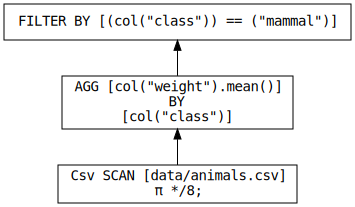

In [32]:
lazy_query.show_graph(optimized=False)

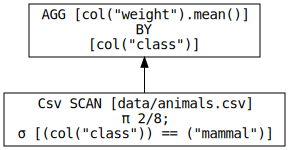

In [33]:
lazy_query.show_graph()

Materialize the datafram

In [34]:
lazy_query.collect()

shape: (1, 2)
┌────────┬─────────────┐
│ class  ┆ weight      │
│ ---    ┆ ---         │
│ str    ┆ f64         │
╞════════╪═════════════╡
│ mammal ┆ 1548.333333 │
└────────┴─────────────┘

### Relaxedness

• pandas allows you to use date Strings when working with dates and times. In
Polars, you have to use a Python datetime data type, or Polars’ own Date or
Datetime data types. <br>
• pandas allows column names to be other data types than Strings. In Polars, only
String names are allowed.<br>
• pandas has many ways to display or work with missing values: None, NaN, NA,
<NA>, NaT, and np.nan, which also depend on the data type. Polars distinguishes
between missing values (null) and invalid numbers (NaN, which stands for “Not a
Number”), and these apply in the same way regardless of the data type.<br>
• As a result, pandas converts Integer columns to Floats when missing values are
introduced (although this doesn’t happen with the new Arrow data types). This is
because the Integer data type cannot contain missing values. Polars does not do
this, as it supports missing values in all data types.<br>
• pandas quietly drops rows with missing values when aggregating (see the previ‐
ous aggregation example). Polars keeps all groups.<br>
• In pandas, columns can fall back to the data type Object even when they’re
actually Strings and Floats. Polars never falls back to generic Python Objects.<br>
• In pandas, you can compare Boolean Series with Integers. With Polars, you can
only compare Boolean Series with Booleans (and Boolean Series).<br>
• In pandas, you can have multiple columns with the same name. In Polars,
column names must be unique.<br>
• In pandas, methods and properties such as df.loc[] return a Series instead of a
DataFrame when only a single value is passed (unless there are multiple columns
with the same name, in which case it does return a DataFrame). Polars returns a
DataFrame with one row.<br>
• In pandas, df.sum(axis=0) returns a Series. In Polars, the same operation
returns a one-row DataFrame<br>

## Common Operations

### Removing Duplicates

In [35]:
animals_pd

animal   class  lifespan           status     weight
0     dolphin  mammal        40    least concern   150000.0
1        duck    bird         8    least concern     3000.0
2    elephant  mammal        60       endangered  8000000.0
3        ibis    bird        16    least concern     1000.0
4      impala  mammal        12    least concern    70000.0
5        kudu  mammal        15    least concern   250000.0
6     narwhal  mammal        40  near threatened        NaN
7       panda  mammal        20       vulnerable   100000.0
8  polar bear  mammal        25       vulnerable   720000.0
9         ray    fish        20              NaN    90000.0

In [36]:
animals_pd.drop_duplicates(subset="class")

animal   class  lifespan         status    weight
0  dolphin  mammal        40  least concern  150000.0
1     duck    bird         8  least concern    3000.0
9      ray    fish        20            NaN   90000.0

In [37]:
animals_pl.unique(subset="class")

shape: (3, 5)
┌─────────┬────────┬──────────┬───────────────┬────────┐
│ animal  ┆ class  ┆ lifespan ┆ status        ┆ weight │
│ ---     ┆ ---    ┆ ---      ┆ ---           ┆ ---    │
│ str     ┆ str    ┆ i64      ┆ str           ┆ i64    │
╞═════════╪════════╪══════════╪═══════════════╪════════╡
│ dolphin ┆ mammal ┆ 40       ┆ least concern ┆ 150    │
│ ray     ┆ fish   ┆ 20       ┆               ┆ 90     │
│ duck    ┆ bird   ┆ 8        ┆ least concern ┆ 3      │
└─────────┴────────┴──────────┴───────────────┴────────┘

### Removing missing values

Drop with missing "weight" col value

In [38]:
animals_pd.dropna(subset="weight")

animal   class  lifespan         status     weight
0     dolphin  mammal        40  least concern   150000.0
1        duck    bird         8  least concern     3000.0
2    elephant  mammal        60     endangered  8000000.0
3        ibis    bird        16  least concern     1000.0
4      impala  mammal        12  least concern    70000.0
5        kudu  mammal        15  least concern   250000.0
7       panda  mammal        20     vulnerable   100000.0
8  polar bear  mammal        25     vulnerable   720000.0
9         ray    fish        20            NaN    90000.0

In [39]:
animals_pl.drop_nulls(subset="weight")

shape: (9, 5)
┌────────────┬────────┬──────────┬───────────────┬────────┐
│ animal     ┆ class  ┆ lifespan ┆ status        ┆ weight │
│ ---        ┆ ---    ┆ ---      ┆ ---           ┆ ---    │
│ str        ┆ str    ┆ i64      ┆ str           ┆ i64    │
╞════════════╪════════╪══════════╪═══════════════╪════════╡
│ dolphin    ┆ mammal ┆ 40       ┆ least concern ┆ 150    │
│ duck       ┆ bird   ┆ 8        ┆ least concern ┆ 3      │
│ elephant   ┆ mammal ┆ 60       ┆ endangered    ┆ 8000   │
│ ibis       ┆ bird   ┆ 16       ┆ least concern ┆ 1      │
│ impala     ┆ mammal ┆ 12       ┆ least concern ┆ 70     │
│ kudu       ┆ mammal ┆ 15       ┆ least concern ┆ 250    │
│ panda      ┆ mammal ┆ 20       ┆ vulnerable    ┆ 100    │
│ polar bear ┆ mammal ┆ 25       ┆ vulnerable    ┆ 720    │
│ ray        ┆ fish   ┆ 20       ┆               ┆ 90     │
└────────────┴────────┴──────────┴───────────────┴────────┘

### Sorting Rows

In [40]:
animals_pd.sort_values("weight",ascending=False)

animal   class  lifespan           status     weight
2    elephant  mammal        60       endangered  8000000.0
8  polar bear  mammal        25       vulnerable   720000.0
5        kudu  mammal        15    least concern   250000.0
0     dolphin  mammal        40    least concern   150000.0
7       panda  mammal        20       vulnerable   100000.0
9         ray    fish        20              NaN    90000.0
4      impala  mammal        12    least concern    70000.0
1        duck    bird         8    least concern     3000.0
3        ibis    bird        16    least concern     1000.0
6     narwhal  mammal        40  near threatened        NaN

In [41]:
animals_pl.sort("weight", descending=True)

shape: (10, 5)
┌────────────┬────────┬──────────┬─────────────────┬────────┐
│ animal     ┆ class  ┆ lifespan ┆ status          ┆ weight │
│ ---        ┆ ---    ┆ ---      ┆ ---             ┆ ---    │
│ str        ┆ str    ┆ i64      ┆ str             ┆ i64    │
╞════════════╪════════╪══════════╪═════════════════╪════════╡
│ narwhal    ┆ mammal ┆ 40       ┆ near threatened ┆ null   │
│ elephant   ┆ mammal ┆ 60       ┆ endangered      ┆ 8000   │
│ polar bear ┆ mammal ┆ 25       ┆ vulnerable      ┆ 720    │
│ kudu       ┆ mammal ┆ 15       ┆ least concern   ┆ 250    │
│ dolphin    ┆ mammal ┆ 40       ┆ least concern   ┆ 150    │
│ panda      ┆ mammal ┆ 20       ┆ vulnerable      ┆ 100    │
│ ray        ┆ fish   ┆ 20       ┆                 ┆ 90     │
│ impala     ┆ mammal ┆ 12       ┆ least concern   ┆ 70     │
│ duck       ┆ bird   ┆ 8        ┆ least concern   ┆ 3      │
│ ibis       ┆ bird   ┆ 16       ┆ least concern   ┆ 1      │
└────────────┴────────┴──────────┴─────────────────┴────────┘

### Casting an existing column

In [42]:
animals_pd.assign(lifespan=animals_pd["lifespan"].astype(float))

animal   class  lifespan           status     weight
0     dolphin  mammal      40.0    least concern   150000.0
1        duck    bird       8.0    least concern     3000.0
2    elephant  mammal      60.0       endangered  8000000.0
3        ibis    bird      16.0    least concern     1000.0
4      impala  mammal      12.0    least concern    70000.0
5        kudu  mammal      15.0    least concern   250000.0
6     narwhal  mammal      40.0  near threatened        NaN
7       panda  mammal      20.0       vulnerable   100000.0
8  polar bear  mammal      25.0       vulnerable   720000.0
9         ray    fish      20.0              NaN    90000.0

In [43]:
animals_pl.with_columns(pl.col("lifespan").cast(pl.Float64))

shape: (10, 5)
┌────────────┬────────┬──────────┬─────────────────┬────────┐
│ animal     ┆ class  ┆ lifespan ┆ status          ┆ weight │
│ ---        ┆ ---    ┆ ---      ┆ ---             ┆ ---    │
│ str        ┆ str    ┆ f64      ┆ str             ┆ i64    │
╞════════════╪════════╪══════════╪═════════════════╪════════╡
│ dolphin    ┆ mammal ┆ 40.0     ┆ least concern   ┆ 150    │
│ duck       ┆ bird   ┆ 8.0      ┆ least concern   ┆ 3      │
│ elephant   ┆ mammal ┆ 60.0     ┆ endangered      ┆ 8000   │
│ ibis       ┆ bird   ┆ 16.0     ┆ least concern   ┆ 1      │
│ impala     ┆ mammal ┆ 12.0     ┆ least concern   ┆ 70     │
│ kudu       ┆ mammal ┆ 15.0     ┆ least concern   ┆ 250    │
│ narwhal    ┆ mammal ┆ 40.0     ┆ near threatened ┆ null   │
│ panda      ┆ mammal ┆ 20.0     ┆ vulnerable      ┆ 100    │
│ polar bear ┆ mammal ┆ 25.0     ┆ vulnerable      ┆ 720    │
│ ray        ┆ fish   ┆ 20.0     ┆                 ┆ 90     │
└────────────┴────────┴──────────┴─────────────────┴────────┘

Polars uses the `pl.col()` function to create an expression.

### Aggregating Rows

In [44]:
animals_pd.groupby(["class","status"])[["weight"]].mean()

weight
class  status                       
bird   least concern    2.000000e+03
mammal endangered       8.000000e+06
       least concern    1.566667e+05
       near threatened           NaN
       vulnerable       4.100000e+05

In [45]:
animals_pl.group_by("class","status").agg(pl.col("weight").mean())

shape: (6, 3)
┌────────┬─────────────────┬────────────┐
│ class  ┆ status          ┆ weight     │
│ ---    ┆ ---             ┆ ---        │
│ str    ┆ str             ┆ f64        │
╞════════╪═════════════════╪════════════╡
│ bird   ┆ least concern   ┆ 2.0        │
│ fish   ┆                 ┆ 90.0       │
│ mammal ┆ endangered      ┆ 8000.0     │
│ mammal ┆ near threatened ┆ null       │
│ mammal ┆ least concern   ┆ 156.666667 │
│ mammal ┆ vulnerable      ┆ 410.0      │
└────────┴─────────────────┴────────────┘

## To and From Pandas

In [47]:
animals_pl = pl.DataFrame(animals_pd)

In [49]:
back_again_df = animals_pl.to_pandas()

In [50]:
back_again_df

animal   class  lifespan           status     weight
0     dolphin  mammal        40    least concern   150000.0
1        duck    bird         8    least concern     3000.0
2    elephant  mammal        60       endangered  8000000.0
3        ibis    bird        16    least concern     1000.0
4      impala  mammal        12    least concern    70000.0
5        kudu  mammal        15    least concern   250000.0
6     narwhal  mammal        40  near threatened        NaN
7       panda  mammal        20       vulnerable   100000.0
8  polar bear  mammal        25       vulnerable   720000.0
9         ray    fish        20              NaN    90000.0

## Recap
- Polars uses Dataframes as the main DataStructure, which is made up of Series Data structures(which is just same datatype column)
- read data from csv with `pl.read_csv("location",separator=",", has_header=True)`
- Polars DOES NOT use index
- treats missing values based on Series/Column Datatype
- even .agg in pl uses Expr which i will learn later
- Axes also have specific functions for either columns or rows and does not mix them up as is the case in pandas
- in indexing, it does not use nested brackets but does use basic brackets for compatibility
- Eagerness Vs Lazy, use `scan_csv()` and all other subsequent operations are lazy and also it does not execute right away but is just the set of instructions if I'm not mistaken, once you use `lazy_query.collect()` it executes
- `lazy_query.show_graph(optimized=False)` or True to see the plan/instruction.
-  Strict Polars<br>
    • pandas allows you to use date Strings when working with dates and times. In
    Polars, you have to use a Python datetime data type, or Polars’ own Date or
    Datetime data types. <br>
    • pandas allows column names to be other data types than Strings. In Polars, only
    String names are allowed.<br>
    • pandas has many ways to display or work with missing values: None, NaN, NA,
    <NA>, NaT, and np.nan, which also depend on the data type. Polars distinguishes
    between missing values (null) and invalid numbers (NaN, which stands for “Not a
    Number”), and these apply in the same way regardless of the data type.<br>
    • As a result, pandas converts Integer columns to Floats when missing values are
    introduced (although this doesn’t happen with the new Arrow data types). This is
    because the Integer data type cannot contain missing values. Polars does not do
    this, as it supports missing values in all data types.<br>
    • pandas quietly drops rows with missing values when aggregating (see the previ‐
    ous aggregation example). Polars keeps all groups.<br>
    • In pandas, columns can fall back to the data type Object even when they’re
    actually Strings and Floats. Polars never falls back to generic Python Objects.<br>
    • In pandas, you can compare Boolean Series with Integers. With Polars, you can
    only compare Boolean Series with Booleans (and Boolean Series).<br>
    • In pandas, you can have multiple columns with the same name. In Polars,
    column names must be unique.<br>
    • In pandas, methods and properties such as df.loc[] return a Series instead of a
    DataFrame when only a single value is passed (unless there are multiple columns
    with the same name, in which case it does return a DataFrame). Polars returns a
    DataFrame with one row.<br>
    • In pandas, df.sum(axis=0) returns a Series. In Polars, the same operation
    returns a one-row DataFrame<br>
- `df.unique(subset="column_name")` removes duplicates
- `df.drop_nulls(subset="column_name")` drops missing values
- `df.sort("column_name", descending=True)` sorting
- `df.with_columns(pl.col("column_name").cast(pl.Float64))`
- `df.group_by("col_nmae", "col_name2").agg(pl.col("col_name3").mean())`
- 
```
pl_df = pl.DataFrame(pd_df)
pd_df = pl_df.to_pandas()
```

# FORM

# Chapter 4

Polars uses the Arrow memory specification, for columnar hierachial formats

## Series, DataFrames and Lazy Frames

In [4]:
sales_series = pl.Series("sales",[150.00,300.00,250.00])
sales_series

shape: (3,)
Series: 'sales' [f64]
[
	150.0
	300.0
	250.0
]

In [5]:
sales_df = pl.DataFrame(
    {
        "sales":sales_series,
        "customer_id":[24,25,26]
    }
)
sales_df

shape: (3, 2)
┌───────┬─────────────┐
│ sales ┆ customer_id │
│ ---   ┆ ---         │
│ f64   ┆ i64         │
╞═══════╪═════════════╡
│ 150.0 ┆ 24          │
│ 300.0 ┆ 25          │
│ 250.0 ┆ 26          │
└───────┴─────────────┘

A LazyFrame is same as a DataFrames for all intents and purposes, but it is not. It is just a set of instruction on how to arrive at a data frame so that the set of instructions can be optimized

In [12]:
lazy_df = pl.scan_csv("data/fruit.csv").with_columns(
    is_heavy=pl.col("weight") > 200
)

In [ ]:
lazy_df #lazy_df.show_graph()

In [11]:
df = lazy_df.collect()
df

shape: (10, 6)
┌────────────┬────────┬────────┬──────────┬───────────────┬──────────┐
│ name       ┆ weight ┆ color  ┆ is_round ┆ origin        ┆ is_heavy │
│ ---        ┆ ---    ┆ ---    ┆ ---      ┆ ---           ┆ ---      │
│ str        ┆ i64    ┆ str    ┆ bool     ┆ str           ┆ bool     │
╞════════════╪════════╪════════╪══════════╪═══════════════╪══════════╡
│ Avocado    ┆ 200    ┆ green  ┆ false    ┆ South America ┆ false    │
│ Banana     ┆ 120    ┆ yellow ┆ false    ┆ Asia          ┆ false    │
│ Blueberry  ┆ 1      ┆ blue   ┆ false    ┆ North America ┆ false    │
│ Cantaloupe ┆ 2500   ┆ orange ┆ true     ┆ Africa        ┆ true     │
│ Cranberry  ┆ 2      ┆ red    ┆ false    ┆ North America ┆ false    │
│ Elderberry ┆ 1      ┆ black  ┆ false    ┆ Europe        ┆ false    │
│ Orange     ┆ 130    ┆ orange ┆ true     ┆ Asia          ┆ false    │
│ Papaya     ┆ 1000   ┆ orange ┆ false    ┆ South America ┆ true     │
│ Peach      ┆ 150    ┆ orange ┆ true     ┆ Asia          ┆ false    │
│ Watermelon ┆ 5000   ┆ green  ┆ true     ┆ Africa        ┆ true     │
└────────────┴────────┴────────┴──────────┴───────────────┴──────────┘

## Data Types

Apache Arrow memory specification for flat and hierachical data is used by Polars

**DANGER**: Objects can not be optimized as Polars uses Rust not Python to see what the object data represents, for example like objects native to python(ML models etc). They just come along for the ride in the data processing pipeline. So they are generally discouraged if they can be represented with another datatype but the author says there are some use cases for it.


### Nested Data Types

Three Nested Data Structure:
- Arrays: Fixed length and similar datatype
- Lists: Not a fixed length but similar datatype, can bypass with list of objects, hence different datatypes
- Structs: Ode to almighty C, it basically lets users store and access, essentially compressing all the columns into one, all mutiple named fields in a single column and then do futher operations

For an array you can specify the inner data type too

In [14]:
coordinates = pl.DataFrame(
    [
        pl.Series("point_2d",[[1,3],[2,5]]),
        pl.Series("point_3d",[[1, 7, 3], [8, 1, 0]]),
    ],
    schema = {
        "point_2d": pl.Array(shape=2, inner=pl.Int64),
        "point_3d": pl.Array(shape=3, inner=pl.Int64)
    }
)
coordinates

shape: (2, 2)
┌───────────────┬───────────────┐
│ point_2d      ┆ point_3d      │
│ ---           ┆ ---           │
│ array[i64, 2] ┆ array[i64, 3] │
╞═══════════════╪═══════════════╡
│ [1, 3]        ┆ [1, 7, 3]     │
│ [2, 5]        ┆ [8, 1, 0]     │
└───────────────┴───────────────┘

List in polars diifers from python lists on the basis on a specified datatype
The only argument a List takes is what data type it contains

In [22]:
weather_readings  = pl.DataFrame(
    {
        "temperature":[[1,23,4,5],[23,123,543,43,123,4]],
        "wind_speed":[[123.0,321.2,231.2],[213.2]]
    },
    # schema={
    #     "temperature":pl.List(inner=pl.Float16),
    #     "wind_speed":pl.List(inner=pl.Float16)
    # }
)
weather_readings

shape: (2, 2)
┌────────────────┬───────────────────────┐
│ temperature    ┆ wind_speed            │
│ ---            ┆ ---                   │
│ list[i64]      ┆ list[f64]             │
╞════════════════╪═══════════════════════╡
│ [1, 23, … 5]   ┆ [123.0, 321.2, 231.2] │
│ [23, 123, … 4] ┆ [213.2]               │
└────────────────┴───────────────────────┘

Why is the second column not float?

A Struct is used work multiple Series/Columns at once

In [29]:
struct_df = pl.Series(
    "data",
    [
        {"a":"A","b":"B","c":"C"},
        {"a":"1", "b":"2", "c":"3"},
    ]
)
struct_df #keys have to be the same and also datatype else mixed datatype error

shape: (2,)
Series: 'data' [struct[3]]
[
	{"A","B","C"}
	{"1","2","3"}
]

### Missing Values

In Polars Missing Data is always represented as null. Also there is a bitmap to see if a value is missing where methods like ` df.null_count()` and `Expr.is_null()` use

In [31]:
missing_df = pl.DataFrame(
{"value": [None, 2, 3, 4, None, None, 7, 8, 9, None]}
)
missing_df

shape: (10, 1)
┌───────┐
│ value │
│ ---   │
│ i64   │
╞═══════╡
│ null  │
│ 2     │
│ 3     │
│ 4     │
│ null  │
│ null  │
│ 7     │
│ 8     │
│ 9     │
│ null  │
└───────┘

**Danger**: `NaN` values are not considered missing in Polars, and used for Float and not counted as null in methods like `df.null_count()` or `Expr.fill_null()`<br> <br>
4 ways you fill in missing data:
- Using a single value
- Using a fill strategy
- Using an expression
- Using an interpolation

In [32]:
missing_df.with_columns(filled_with_single_value=pl.col("value").fill_null(-1))

shape: (10, 2)
┌───────┬──────────────────────────┐
│ value ┆ filled_with_single_value │
│ ---   ┆ ---                      │
│ i64   ┆ i64                      │
╞═══════╪══════════════════════════╡
│ null  ┆ -1                       │
│ 2     ┆ 2                        │
│ 3     ┆ 3                        │
│ 4     ┆ 4                        │
│ null  ┆ -1                       │
│ null  ┆ -1                       │
│ 7     ┆ 7                        │
│ 8     ┆ 8                        │
│ 9     ┆ 9                        │
│ null  ┆ -1                       │
└───────┴──────────────────────────┘

with fill strategy, many options are available


In [33]:
missing_df.with_columns(
    foward=pl.col("value").fill_null(strategy="forward"),
    backward=pl.col("value").fill_null(strategy="backward"),
    min_=pl.col("value").fill_null(strategy="min"),
    max_=pl.col("value").fill_null(strategy="max"),
    mean=pl.col("value").fill_null(strategy="mean"),
    zero=pl.col("value").fill_null(strategy="zero"),
    one=pl.col("value").fill_null(strategy="one")    

)

shape: (10, 8)
┌───────┬────────┬──────────┬──────┬──────┬──────┬──────┬─────┐
│ value ┆ foward ┆ backward ┆ min_ ┆ max_ ┆ mean ┆ zero ┆ one │
│ ---   ┆ ---    ┆ ---      ┆ ---  ┆ ---  ┆ ---  ┆ ---  ┆ --- │
│ i64   ┆ i64    ┆ i64      ┆ i64  ┆ i64  ┆ i64  ┆ i64  ┆ i64 │
╞═══════╪════════╪══════════╪══════╪══════╪══════╪══════╪═════╡
│ null  ┆ null   ┆ 2        ┆ 2    ┆ 9    ┆ 5    ┆ 0    ┆ 1   │
│ 2     ┆ 2      ┆ 2        ┆ 2    ┆ 2    ┆ 2    ┆ 2    ┆ 2   │
│ 3     ┆ 3      ┆ 3        ┆ 3    ┆ 3    ┆ 3    ┆ 3    ┆ 3   │
│ 4     ┆ 4      ┆ 4        ┆ 4    ┆ 4    ┆ 4    ┆ 4    ┆ 4   │
│ null  ┆ 4      ┆ 7        ┆ 2    ┆ 9    ┆ 5    ┆ 0    ┆ 1   │
│ null  ┆ 4      ┆ 7        ┆ 2    ┆ 9    ┆ 5    ┆ 0    ┆ 1   │
│ 7     ┆ 7      ┆ 7        ┆ 7    ┆ 7    ┆ 7    ┆ 7    ┆ 7   │
│ 8     ┆ 8      ┆ 8        ┆ 8    ┆ 8    ┆ 8    ┆ 8    ┆ 8   │
│ 9     ┆ 9      ┆ 9        ┆ 9    ┆ 9    ┆ 9    ┆ 9    ┆ 9   │
│ null  ┆ 9      ┆ null     ┆ 2    ┆ 9    ┆ 5    ┆ 0    ┆ 1   │
└───────┴────────┴──────────┴──────┴──────┴──────┴──────┴─────┘

In [35]:
missing_df.with_columns(
    expression_mean=pl.col("value").fill_null(pl.col("value").mean())
)

shape: (10, 2)
┌───────┬─────────────────┐
│ value ┆ expression_mean │
│ ---   ┆ ---             │
│ i64   ┆ f64             │
╞═══════╪═════════════════╡
│ null  ┆ 5.5             │
│ 2     ┆ 2.0             │
│ 3     ┆ 3.0             │
│ 4     ┆ 4.0             │
│ null  ┆ 5.5             │
│ null  ┆ 5.5             │
│ 7     ┆ 7.0             │
│ 8     ┆ 8.0             │
│ 9     ┆ 9.0             │
│ null  ┆ 5.5             │
└───────┴─────────────────┘

In [37]:
missing_df.interpolate()

shape: (10, 1)
┌───────┐
│ value │
│ ---   │
│ f64   │
╞═══════╡
│ null  │
│ 2.0   │
│ 3.0   │
│ 4.0   │
│ 5.0   │
│ 6.0   │
│ 7.0   │
│ 8.0   │
│ 9.0   │
│ null  │
└───────┘

In [38]:
missing_df

shape: (10, 1)
┌───────┐
│ value │
│ ---   │
│ i64   │
╞═══════╡
│ null  │
│ 2     │
│ 3     │
│ 4     │
│ null  │
│ null  │
│ 7     │
│ 8     │
│ 9     │
│ null  │
└───────┘

## Data Type Conversion

`Expr.cast()` or `df.cast()` for a single column or whole df respectively

In [39]:
string_df = pl.DataFrame({"id":["1000000","20000","300000"]})
print(f"Estimated size: {string_df.estimated_size("b")} bytes")

Estimated size: 18 bytes


In [42]:
int_df = string_df.select(pl.col("id").cast(pl.UInt32))
print(f"Estimated size: {int_df.estimated_size("b")} bytes")

Estimated size: 12 bytes


In [48]:
print( ((18-12)/18)*100,"% mem saved" )

33.33333333333333 % mem saved


In [50]:
string_df.cast(pl.UInt32) #also for full dataframes

shape: (3, 1)
┌─────────┐
│ id      │
│ ---     │
│ u32     │
╞═════════╡
│ 1000000 │
│ 20000   │
│ 300000  │
└─────────┘

In [51]:
data_types_df = pl.DataFrame(
{
"id": [10000, 20000, 30000],
"value": [1.0, 2.0, 3.0],
"value2": ["1", "2", "3"],
}
)

In [53]:
data_types_df.cast(
    {"id":pl.UInt16,
    "value": pl.Float32,
    "value2":pl.UInt8}
)

shape: (3, 3)
┌───────┬───────┬────────┐
│ id    ┆ value ┆ value2 │
│ ---   ┆ ---   ┆ ---    │
│ u16   ┆ f32   ┆ u8     │
╞═══════╪═══════╪════════╡
│ 10000 ┆ 1.0   ┆ 1      │
│ 20000 ┆ 2.0   ┆ 2      │
│ 30000 ┆ 3.0   ┆ 3      │
└───────┴───────┴────────┘

In [54]:
data_types_df.cast({pl.Float64: pl.Float32, pl.String: pl.UInt8})

shape: (3, 3)
┌───────┬───────┬────────┐
│ id    ┆ value ┆ value2 │
│ ---   ┆ ---   ┆ ---    │
│ i64   ┆ f32   ┆ u8     │
╞═══════╪═══════╪════════╡
│ 10000 ┆ 1.0   ┆ 1      │
│ 20000 ┆ 2.0   ┆ 2      │
│ 30000 ┆ 3.0   ┆ 3      │
└───────┴───────┴────────┘

In [56]:
import polars.selectors as cs


In [57]:
data_types_df.cast({cs.numeric():pl.UInt16})

shape: (3, 3)
┌───────┬───────┬────────┐
│ id    ┆ value ┆ value2 │
│ ---   ┆ ---   ┆ ---    │
│ u16   ┆ u16   ┆ str    │
╞═══════╪═══════╪════════╡
│ 10000 ┆ 1     ┆ 1      │
│ 20000 ┆ 2     ┆ 2      │
│ 30000 ┆ 3     ┆ 3      │
└───────┴───────┴────────┘

## Recap Chatper 4
- Polars using Apache Arrow memory specification, for flat hierachial data
- mainly polars uses Series, DataFrames and LazyFrames
- LazyFrame is DataFrame that has no data but a set of instructions on how to get the data, which can be optimized
- Datatypes that are novel
    - Temporal data: Date, Datetime, Duration, Time
    - Nested: Array, List, String
    - Other: Unknown
- try to use standard datatypes whenever possible to help optimize queries instead of object datatypes
- Array Dataype, can use schema option and change inner
- pl.List is not the same as python's List
- Stuct is basically combining all the columns into one
- Missing values, in Polars is represented as null. There is also a validity bitmap whether a value is stored or not which df.null_count() or Expr.is_null() use for quick checks
- 4 ways to fill missing, single, strat(mean,max etc), Expr and interpolation
- Also NaN is not considered missing data in Polars so df.null_count() etc do not count it. Have to use Expr.is_nan() etc, usually have to worry when data from Pandas DataFrames are exported to Polars
- Data Type Conversion
    - df.cast() for whole DataFrames casting
    - Expr.cast() for column wise essentially
    - Can use dictionary to replace certain types with other types or even certain columns to other types
    - also polars.selectors or column selectoes that select numerics,alphanumerics etc

# Chapter 5

## Eager API


Use for EDA and immediate feedback of the DATA but not advised for a finished data pipeline

In [6]:
trips =pl.read_parquet("data/taxi/yellow_tripdata_2022-01.parquet")
trips.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [7]:
?trips.flags

Type:        property
String form: <property object at 0x7d020a054950>
Docstring:  
Get flags that are set on the columns of this DataFrame.

Returns
-------
dict
    Mapping from column names to column flags.

In [8]:
trips.flags

{'VendorID': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'tpep_pickup_datetime': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'tpep_dropoff_datetime': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'passenger_count': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'trip_distance': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'RatecodeID': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'store_and_fwd_flag': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'PULocationID': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'DOLocationID': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'payment_type': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'fare_amount': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'extra': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'mta_tax': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'tip_amount': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'tolls_amount': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'improvement_surcharge': {'SORTED_ASC': False, 'SORTED_DESC': F

In [9]:
trips

shape: (2_463_931, 19)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ VendorID ┆ tpep_pick ┆ tpep_drop ┆ passenger ┆ … ┆ improveme ┆ total_amo ┆ congestio ┆ airport_f │
│ ---      ┆ up_dateti ┆ off_datet ┆ _count    ┆   ┆ nt_surcha ┆ unt       ┆ n_surchar ┆ ee        │
│ i64      ┆ me        ┆ ime       ┆ ---       ┆   ┆ rge       ┆ ---       ┆ ge        ┆ ---       │
│          ┆ ---       ┆ ---       ┆ f64       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ f64       │
│          ┆ datetime[ ┆ datetime[ ┆           ┆   ┆ f64       ┆           ┆ f64       ┆           │
│          ┆ ns]       ┆ ns]       ┆           ┆   ┆           ┆           ┆           ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1        ┆ 2022-01-0 ┆ 2022-01-0 ┆ 2.0       ┆ … ┆ 0.3       ┆ 21.95     ┆ 2.5       ┆ 0.0       │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 00:35:40  ┆ 00:53:29  ┆           ┆   ┆           ┆           ┆           ┆           │
│ 1        ┆ 2022-01-0 ┆ 2022-01-0 ┆ 1.0       ┆ … ┆ 0.3       ┆ 13.3      ┆ 0.0       ┆ 0.0       │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 00:33:43  ┆ 00:42:07  ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2        ┆ 2022-01-0 ┆ 2022-01-0 ┆ 1.0       ┆ … ┆ 0.3       ┆ 10.56     ┆ 0.0       ┆ 0.0       │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 00:53:21  ┆ 01:02:19  ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2        ┆ 2022-01-0 ┆ 2022-01-0 ┆ 1.0       ┆ … ┆ 0.3       ┆ 11.8      ┆ 2.5       ┆ 0.0       │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 00:25:21  ┆ 00:35:23  ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2        ┆ 2022-01-0 ┆ 2022-01-0 ┆ 1.0       ┆ … ┆ 0.3       ┆ 30.3      ┆ 2.5       ┆ 0.0       │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 00:36:48  ┆ 01:14:20  ┆           ┆   ┆           ┆           ┆           ┆           │
│ …        ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2        ┆ 2022-01-3 ┆ 2022-01-3 ┆ null      ┆ … ┆ 0.3       ┆ 13.69     ┆ null      ┆ null      │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 23:36:53  ┆ 23:42:51  ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2        ┆ 2022-01-3 ┆ 2022-01-3 ┆ null      ┆ … ┆ 0.3       ┆ 24.45     ┆ null      ┆ null      │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 23:44:22  ┆ 23:55:01  ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2        ┆ 2022-01-3 ┆ 2022-01-3 ┆ null      ┆ … ┆ 0.3       ┆ 16.52     ┆ null      ┆ null      │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 23:39:00  ┆ 23:50:00  ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2        ┆ 2022-01-3 ┆ 2022-01-3 ┆ null      ┆ … ┆ 0.3       ┆ 15.7      ┆ null      ┆ null      │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 23:36:42  ┆ 23:48:45  ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2        ┆ 2022-01-3 ┆ 2022-02-0 ┆ null      ┆ … ┆ 0.3       ┆ 35.06     ┆ null      ┆ null      │
│          ┆ 1         ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 23:46:00  ┆ 00:13:00  ┆           ┆   ┆           ┆           ┆           ┆           │
└──────────┴───────────┴───────────┴──

In [10]:
#sum_per_vendor = trips.group_by("VendorID").sum()
sum_per_vendor = trips.drop("store_and_fwd_flag","tpep_pickup_datetime","tpep_dropoff_datetime").group_by("VendorID").sum()

In [11]:
income_per_distance_per_vendor = sum_per_vendor.select(
    "VendorID",
    income_per_distance=pl.col("total_amount")/pl.col("trip_distance")
)
top_three = income_per_distance_per_vendor.sort(
    by="income_per_distance", descending=True
).head(3)
top_three

shape: (3, 2)
┌──────────┬─────────────────────┐
│ VendorID ┆ income_per_distance │
│ ---      ┆ ---                 │
│ i64      ┆ f64                 │
╞══════════╪═════════════════════╡
│ 1        ┆ 6.445081            │
│ 6        ┆ 4.61666             │
│ 5        ┆ 4.023696            │
└──────────┴─────────────────────┘

## Lazy API

Basically instruction set to optimize. Use for finished data pipeline to get maximum gains, just like 1.5g of protein for every Kg, maybe 2g if i'm lucky xD
Or as the author says "The lazy API defers executing all selection, filtering, and manipulation until the
moment it is actually needed. This gives the query engine more information about
what data and transformations are actually needed, and allows for a bunch of opti‐
mizations that heavily increase performance."

Basically the speed gains from the lazydata api approach is not magic but simply doing "jugaad". Like at the scan level, it reads the columns that absolutely required, like if you read a data file and then filter column and the select even lesser column, it probably would read only the selected columns in the first place. Basically it does "gomma jugaad".

Also it catches datatype errors at the scan level, namely Schema errors. The "Query Plan", ie optimized instruction set, basically has all the info on what needs to happen, what the happened should like after it happens etc

In [17]:
#Errorenouss Query
names = pl.LazyFrame(
    {"name":["A","B","C"], "age":[1,2,None]}
)

In [18]:
err_query = names.with_columns(
    slice_age=pl.col("age").str.slice(1,3) #not possible as age is int but still loads and waits
)

In [19]:
?err_query.cache

Signature: err_query.cache() -> 'LazyFrame'
Docstring:
Cache the result once the execution of the physical plan hits this node.

It is not recommended using this as the optimizer likely can do a better job.
File:      /usr/local/python/3.12.1/lib/python3.12/site-packages/polars/lazyframe/frame.py
Type:      method

In [20]:
?err_query.flag

Object `err_query.flag` not found.


In [26]:
names.null_count().collect()

shape: (1, 2)
┌──────┬─────┐
│ name ┆ age │
│ ---  ┆ --- │
│ u32  ┆ u32 │
╞══════╪═════╡
│ 0    ┆ 1   │
└──────┴─────┘

In [27]:
err_query.explain()

' WITH_COLUMNS:\n [col("age").str.slice([dyn int: 1, dyn int: 3]).alias("slice_age")] \n  DF ["name", "age"]; PROJECT */2 COLUMNS'

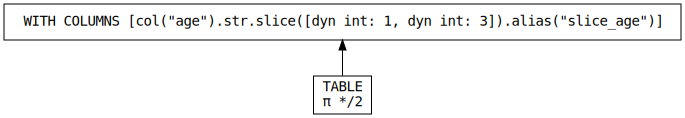

In [20]:
err_query.show_graph()

In [11]:
try:
    results = err_query.collect()
except Exception as e:
    print(e)
    print("READ THE DOCS ")

invalid series dtype: expected `String`, got `i64` for series with name `age`
READ THE DOCS 


## Performance Diff

Polars' Lazy API query optimizer uses a built-in, rule-based optimization engine that leverages decades of relational database research; it does not use artificial intelligence (AI) or machine learning to optimize each query. 
<br>**How the Polars Optimizer Works**
When you use the LazyFrame API, Polars builds a logical plan (a Directed Acyclic Graph or DAG) of the operations, which it then optimizes before execution. The optimizations are based on a set of predefined rules and heuristics, not AI that learns from past queries. 
<br>Key optimization techniques include:
- Predicate Pushdown: Filters are moved as early as possible in the query plan, often to the data source scan level (e.g., in Parquet files using file statistics), to reduce the amount of data processed downstream.
- Projection Pushdown: Only the necessary columns are selected and read from the source, minimizing memory usage and I/O.
- Join Optimization: The engine estimates data characteristics (like cardinality) to determine the most efficient join strategies and their execution order to minimize memory pressure.
Common Subexpression Elimination: Redundant computations are identified and computed only once, and the results reused.
- Expression Simplification and Query Rewriting: Complex operations are replaced with faster, simpler equivalents, and entire sequences of operations might be reordered for better performance. 
- You can inspect the logical plan and the optimizations Polars applies to your query using the .explain() method on a LazyFrame object. This visibility allows you to see how the built-in rules transform your original query into an optimized execution plan. 

For the above example where we group_by VendorID and agg sum and only select 2 rows(one is Vendor ID and the other is computed col which is amt/dist, and then sort it and select top 3), the lazy api does it 10 times faster, maybe cause it selects 3 cols in the first place, and then does agg and then compute. But with simple ML model trained you could've figured  $dist \propto totaldist \propto cost $ given price follows std pricing and hence sorted there and then agg has only 3 rows

But let's not use ML for everything lol

Also since you do not want to run same calcultaions multiple times, you cache intermediate results after heavy computations, with lf.collect()

## Functionality Diff

### Attributes Of LazyFrames

Of all the attributes that are available to a DataFrame, the LazyFrame lacks shape,
height, and flags. Cause it uses Schema and query optimization so it doesn't read the data so height(no of rows), shape, .flags(sorted or not, empty or not (maybe) idk) attributes are not available

### Aggregation Methods

Method
DataFrame 
LazyFrame

.min()
✓
✓
.min_horizontal()
✓

.product()
✓

.quantile(…)
✓
✓
.std(…)
✓
✓
.sum()
✓
✓
.sum_horizontal(…)
✓
.var(…)
✓
✓
.count()
✓
✓
.max()
✓

.max_horizontal()
✓

.mean()
✓

.mean_horizontal(…)
✓

.median()
✓
✓


### Computations Methods

DataFrames have computaion methods 
- df.fold() which allows you to provide a method that reduces two columns to one (like column transform)
- df.hash_rows() hashes all info on to row with UInt64

<br>
LazyFrames do not have any computations methods when this book was published

### Descriptive Methods
Methods the describe the DataFrame or Lazy Frame. 
Lazy Frame has 3:
- lf.show_graph()
- lf.explain() it's just show group but with text lol
- lf.null_count().collect() to display null count, so? is it a laztframe method?


```
.approx_n_unique()
.describe(…)
.estimated_size(…)
.explain(…)
.glimpse()
.is_duplicated()
.is_empty()
.is_unique()
.n_chunks()
.n_unique(…)
.null_count()
.show_graph(…)
```
a LazyFrame technically has lf.describe() but you need to run `.collect()` first

### Grouby Methods

All methods you can apply to both LazyFrames and DataFrames but DataFrame let's iterate with magic method  `.__iter__()`

```
.__iter__() #only for DataFrames
.agg(…)
.all()
.count()
.first()
.head(…)
.last()
.len()
.map_groups(…)
.max()
.mean()
.median()
.min()
.n_unique()
.quantile(…)
.sum()
.tail(…)
```

### Exporting Methods 
To various other formates (csv, torchtensor, to jax etc) but from dataframes only lol cause the data has to be there xD
``` python
df.to_arrow(…)#Collect the underlying Arrow arrays in an Arrow table.
df.to_dict(…) #Convert DataFrame to a dictionary mapping Series name to values.
df.to_dicts() #Convert every row to a dictionary of Python-native values.
df.to_init_repr(…) #Convert DataFrame to instantiable String representation.
df.to_jax(…) #Convert DataFrame to a JAX array, or dict of JAX arrays.
df.to_numpy(…) #Convert this DataFrame to a NumPy ndarray.
df.to_pandas(…) #Convert this DataFrame to a pandas DataFrame.
df.to_struct(…) #Convert a DataFrame to a Series of type Struct.
df.to_torch(…)
```


### Manipulation and Selection Methods
This all the filter and select methos akin to RDBMS typshii


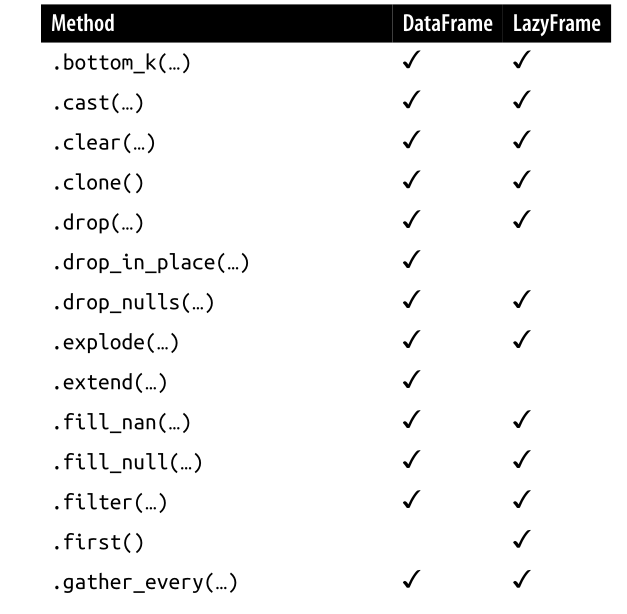

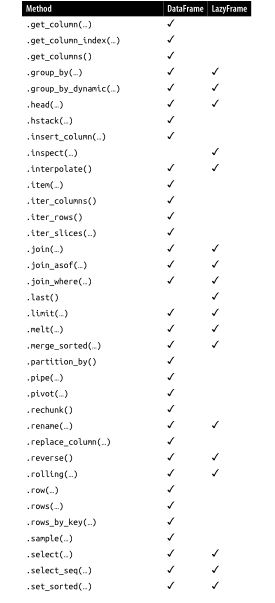

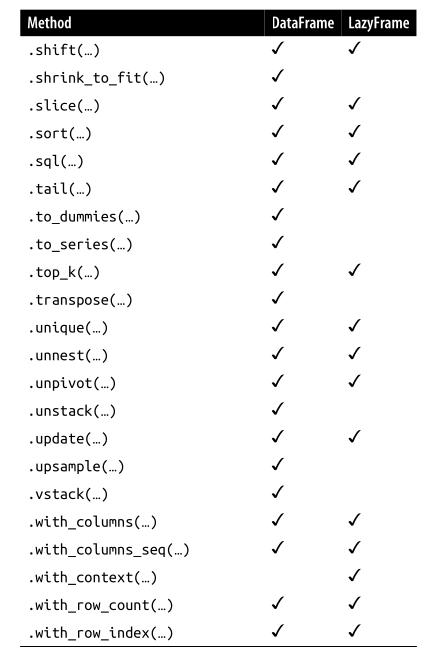

### Miscellaneous Methods
Basically these methods don't fit in the aforementioned categories

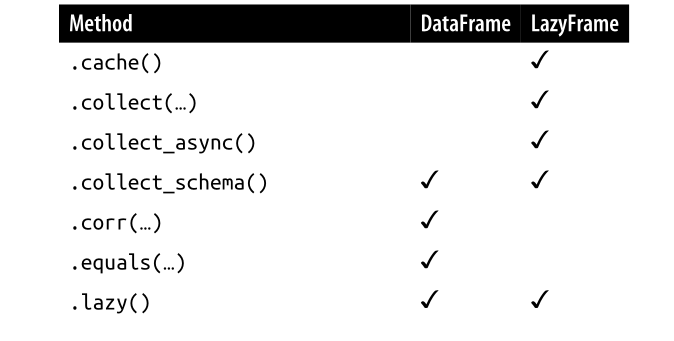

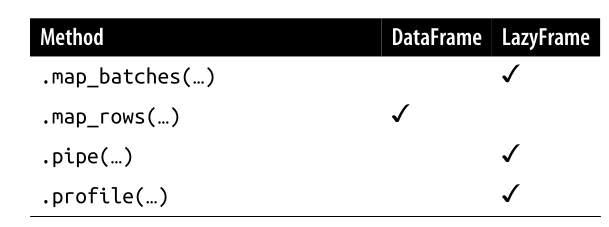

## Tips And Tricls

### Goint from lf to df and vice versa

In [7]:
df = pl.DataFrame(
    {
        "col":[1,2,3,4], "col_2":["a","b","d","c"]
    }
)

tells the query planner to use this data(df) as the straing point

In [ ]:
lf = df.lazy() #tells the query planner to use this data(df) as the straing point

In [10]:
df_2 = lf.collect()

In [14]:
try:
    df_2.equals(lf)
except Exception as e:
    print(e,"AND THEN ANYWAYS..........")
    print(df_2.equals(df))

expected `other` to be a 'DataFrame', not 'LazyFrame' AND THEN ANYWAYS..........
True


In [17]:
data_df = pl.DataFrame(
    {"col_1":[1,2,3], "col_2":["a","b","c"]}
)
data_lf = pl.LazyFrame(
    {"col_1":[3,2,1], "col_3":["aa","bb","cc"]}
)
try:
    data_lf.join(data_df ,on="col_1").collect()
except Exception as e:
    print(e)
    print("")
    print(data_lf.join(data_df.lazy() ,on="col_1").collect())


expected `other` to be a 'LazyFrame', not 'DataFrame'

shape: (3, 3)
┌───────┬───────┬───────┐
│ col_1 ┆ col_3 ┆ col_2 │
│ ---   ┆ ---   ┆ ---   │
│ i64   ┆ str   ┆ str   │
╞═══════╪═══════╪═══════╡
│ 1     ┆ cc    ┆ a     │
│ 2     ┆ bb    ┆ b     │
│ 3     ┆ aa    ┆ c     │
└───────┴───────┴───────┘


### Caching Intermittent Results

just do `lf.collect().lazy()` so the new lazy starts it's query plan from `lf.collect()` and does not compute the prev steps

In [20]:
data_lf
#some heavy computation
new_lf = data_lf.collect().lazy()
#new_lf has pointer to data_lf.collect()

### Joining a DataFrame with LazyFrame

Normally if you try to join a lazyframe with a dataframe, it will result in an error, given all other cond. like col names and other stuff are a-ok.
So either convert lazyframe to df with `.collect()` or make the df lazy with `df.lazy()`

## Recap
- Eager API does in place caluclations like pandas DataFrame
   <br> Useful for:
    - EDA 
    - Visualization
- LazyAPI uses a query optimizer under the hood to optimize query and reduce processing time enchancing speed
    <br>USefull:
    - Finished/Production DataPipeline For ML etc
    - *Works Smarter not Harder*
    - Also catches Datatype Errors so it might be useful to use this also as you go along for Data Transformation Pipeline

- Functionality Diff
    - Agg Methods
        - Horizontal and Vertical have diff names
    - Computation Methods 
        - `df.fold` `df.hash_rows` for DataFrames while LazyFrames have no computation methods
    - Descriptive Methods
        - Basically describes the dataframe, or lazy frame with approriate data, like size, null, query plan etc

    - Groupby methods:
        - Group the Data on some cond. DataFrames has the magic funct `.__iter__()`
    - Exporting Methods
        - to specific data stores like csv, torchtensor, jax etc

    - Manipulation and selection methods<br>
        - Argubally the most important group of methods for data access and manipulation. Basic RDBMS
    - Other Methods:
        - useful shizz in the Polars API Library

- Tips and Tricks:
    - to df and lf use `.collect` and `.lazy()`
    - Cache results after heavy computation so the lazyframe does not compute the calculations again





# Chapter 6

Polars has over 30 functions for reading data and each of them accept many arguments

Additional packages:
- xlsv2csv
- charder #detects characted encoding
- Connector X to connect to databases
- pyarrow # to read pyarrow datasets but cmon this is dominating data science rn

## Format Overview

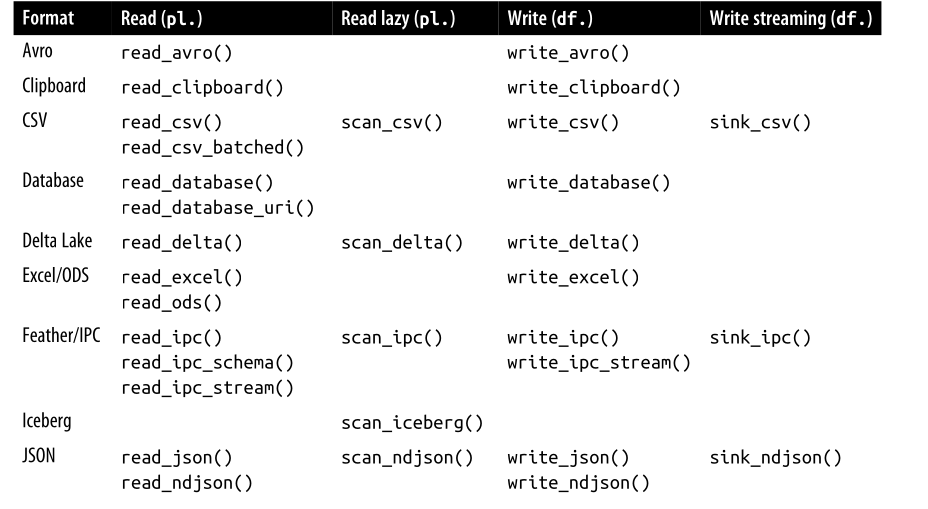


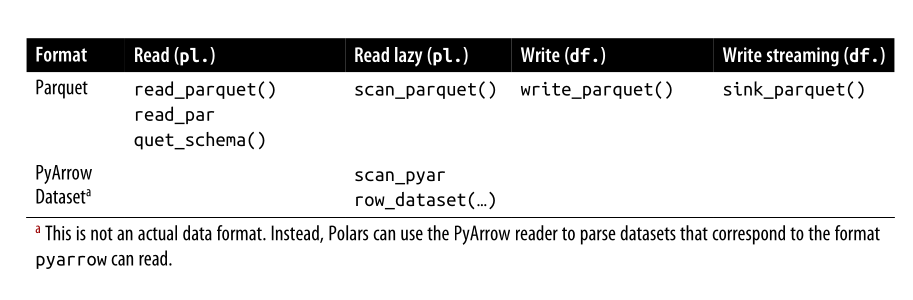


## Reading CSV Files

Polars with default atgs can do basically what's needed. but still you have options or(args) for almost every use case

In [4]:
! cat data/penguins.csv

"rowid","species","island","bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","sex","year"
"1","Adelie","Torgersen",39.1,18.7,181,3750,"male",2007
"2","Adelie","Torgersen",39.5,17.4,186,3800,"female",2007
"3","Adelie","Torgersen",40.3,18,195,3250,"female",2007
"4","Adelie","Torgersen",NA,NA,NA,NA,NA,2007
"5","Adelie","Torgersen",36.7,19.3,193,3450,"female",2007
"6","Adelie","Torgersen",39.3,20.6,190,3650,"male",2007
"7","Adelie","Torgersen",38.9,17.8,181,3625,"female",2007
"8","Adelie","Torgersen",39.2,19.6,195,4675,"male",2007
"9","Adelie","Torgersen",34.1,18.1,193,3475,NA,2007
"10","Adelie","Torgersen",42,20.2,190,4250,NA,2007
"11","Adelie","Torgersen",37.8,17.1,186,3300,NA,2007
"12","Adelie","Torgersen",37.8,17.3,180,3700,NA,2007
"13","Adelie","Torgersen",41.1,17.6,182,3200,"female",2007
"14","Adelie","Torgersen",38.6,21.2,191,3800,"male",2007
"15","Adelie","Torgersen",34.6,21.1,198,4400,"male",2007
"16","Adelie","Torgersen",36.6,17.8,185,3700,"female",2007
"17","Ade

In [7]:
penguins = pl.read_csv("data/penguins.csv")
penguins.head(),penguins.height

(shape: (5, 9)
 ┌───────┬─────────┬───────────┬────────────────┬───┬─────────────────┬─────────────┬────────┬──────┐
 │ rowid ┆ species ┆ island    ┆ bill_length_mm ┆ … ┆ flipper_length_ ┆ body_mass_g ┆ sex    ┆ year │
 │ ---   ┆ ---     ┆ ---       ┆ ---            ┆   ┆ mm              ┆ ---         ┆ ---    ┆ ---  │
 │ i64   ┆ str     ┆ str       ┆ str            ┆   ┆ ---             ┆ str         ┆ str    ┆ i64  │
 │       ┆         ┆           ┆                ┆   ┆ str             ┆             ┆        ┆      │
 ╞═══════╪═════════╪═══════════╪════════════════╪═══╪═════════════════╪═════════════╪════════╪══════╡
 │ 1     ┆ Adelie  ┆ Torgersen ┆ 39.1           ┆ … ┆ 181             ┆ 3750        ┆ male   ┆ 2007 │
 │ 2     ┆ Adelie  ┆ Torgersen ┆ 39.5           ┆ … ┆ 186             ┆ 3800        ┆ female ┆ 2007 │
 │ 3     ┆ Adelie  ┆ Torgersen ┆ 40.3           ┆ … ┆ 195             ┆ 3250        ┆ female ┆ 2007 │
 │ 4     ┆ Adelie  ┆ Torgersen ┆ NA             ┆ … ┆ NA           

**CSV ARGS** `pl.read_csv()`

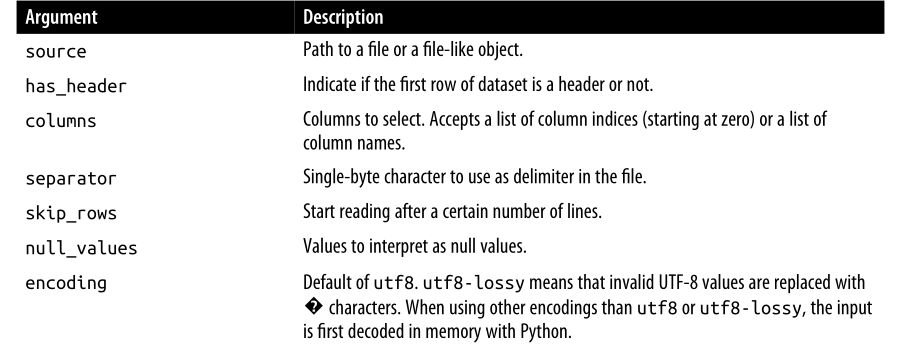


## Parsing Missing Values Correctly

In [4]:
penguins = pl.read_csv("data/penguins.csv", null_values="NA") #looks from string NA and makes it null 
#also the datatype changed from str to float after null values were handled

In [3]:
penguins

shape: (344, 9)
┌───────┬───────────┬───────────┬────────────────┬───┬───────────────┬─────────────┬────────┬──────┐
│ rowid ┆ species   ┆ island    ┆ bill_length_mm ┆ … ┆ flipper_lengt ┆ body_mass_g ┆ sex    ┆ year │
│ ---   ┆ ---       ┆ ---       ┆ ---            ┆   ┆ h_mm          ┆ ---         ┆ ---    ┆ ---  │
│ i64   ┆ str       ┆ str       ┆ f64            ┆   ┆ ---           ┆ i64         ┆ str    ┆ i64  │
│       ┆           ┆           ┆                ┆   ┆ i64           ┆             ┆        ┆      │
╞═══════╪═══════════╪═══════════╪════════════════╪═══╪═══════════════╪═════════════╪════════╪══════╡
│ 1     ┆ Adelie    ┆ Torgersen ┆ 39.1           ┆ … ┆ 181           ┆ 3750        ┆ male   ┆ 2007 │
│ 2     ┆ Adelie    ┆ Torgersen ┆ 39.5           ┆ … ┆ 186           ┆ 3800        ┆ female ┆ 2007 │
│ 3     ┆ Adelie    ┆ Torgersen ┆ 40.3           ┆ … ┆ 195           ┆ 3250        ┆ female ┆ 2007 │
│ 4     ┆ Adelie    ┆ Torgersen ┆ null           ┆ … ┆ null          ┆ null        ┆ null   ┆ 2007 │
│ 5     ┆ Adelie    ┆ Torgersen ┆ 36.7           ┆ … ┆ 193           ┆ 3450        ┆ female ┆ 2007 │
│ …     ┆ …         ┆ …         ┆ …              ┆ … ┆ …             ┆ …           ┆ …      ┆ …    │
│ 340   ┆ Chinstrap ┆ Dream     ┆ 55.8           ┆ … ┆ 207           ┆ 4000        ┆ male   ┆ 2009 │
│ 341   ┆ Chinstrap ┆ Dream     ┆ 43.5           ┆ … ┆ 202           ┆ 3400        ┆ female ┆ 2009 │
│ 342   ┆ Chinstrap ┆ Dream     ┆ 49.6           ┆ … ┆ 193           ┆ 3775        ┆ male   ┆ 2009 │
│ 343   ┆ Chinstrap ┆ Dream     ┆ 50.8           ┆ … ┆ 210           ┆ 4100        ┆ male   ┆ 2009 │
│ 344   ┆ Chinstrap ┆ Dream     ┆ 50.2           ┆ … ┆ 198           ┆ 3775        ┆ female ┆ 2009 │
└───────┴───────────┴───────────┴────────────────┴───┴───────────────┴─────────────┴────────┴──────┘

`df.null_count`

In [5]:
penguins.null_count().transpose(
    include_header=True, column_names=["null_count"]
)

shape: (9, 2)
┌───────────────────┬────────────┐
│ column            ┆ null_count │
│ ---               ┆ ---        │
│ str               ┆ u32        │
╞═══════════════════╪════════════╡
│ rowid             ┆ 0          │
│ species           ┆ 0          │
│ island            ┆ 0          │
│ bill_length_mm    ┆ 2          │
│ bill_depth_mm     ┆ 2          │
│ flipper_length_mm ┆ 2          │
│ body_mass_g       ┆ 2          │
│ sex               ┆ 11         │
│ year              ┆ 0          │
└───────────────────┴────────────┘

## Reading Files with other encoding

In [6]:
%pip install chardet


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install deep-translator


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import chardet
from deep_translator import GoogleTranslator

``` python
text_to_translate = "Bonjour le monde"

# Automatic language detection (source='auto') and translation to English (target='en')
translated_text = GoogleTranslator(source='auto', target='en').translate(text_to_translate)

print(f"Original text: {text_to_translate}")
print(f"Translated text: {translated_text}")
```

In [17]:
df = pl.read_csv("data/directors.csv", encoding="EUC-CN") #wrong enconding

In [16]:
translated_text = GoogleTranslator(source='auto', target='en').translate(df["country"][0])
translated_text

'Weeping sculpture'

In [18]:
def detect_encoding(filename:str) -> str:
    with open(filename,"rb") as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
        return result["encoding"]
detect_encoding("data/directors.csv")

'EUC-JP'

In [19]:
df = pl.read_csv("data/directors.csv", encoding='EUC-JP') #wrong enconding

In [20]:
translated_text = GoogleTranslator(source='auto', target='en').translate(df["country"][0])
translated_text

'Japan'

Seems about right

## Reading Excel SpreadSheets

In [23]:
%pip install fastexcel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.2 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
songs = pl.read_excel("data/top2000-2023.xlsx")

In [25]:
songs

shape: (2_000, 4)
┌─────────┬─────────────────────────┬────────────────┬──────┐
│ positie ┆ titel                   ┆ artiest        ┆ jaar │
│ ---     ┆ ---                     ┆ ---            ┆ ---  │
│ i64     ┆ str                     ┆ str            ┆ i64  │
╞═════════╪═════════════════════════╪════════════════╪══════╡
│ 1       ┆ Bohemian Rhapsody       ┆ Queen          ┆ 1975 │
│ 2       ┆ Roller Coaster          ┆ Danny Vera     ┆ 2019 │
│ 3       ┆ Hotel California        ┆ Eagles         ┆ 1977 │
│ 4       ┆ Piano Man               ┆ Billy Joel     ┆ 1974 │
│ 5       ┆ Fix You                 ┆ Coldplay       ┆ 2005 │
│ …       ┆ …                       ┆ …              ┆ …    │
│ 1996    ┆ Charlie Brown           ┆ Coldplay       ┆ 2011 │
│ 1997    ┆ Beast Of Burden         ┆ Bette Midler   ┆ 1984 │
│ 1998    ┆ It Was A Very Good Year ┆ Frank Sinatra  ┆ 1968 │
│ 1999    ┆ Hou Van Mij             ┆ 3JS            ┆ 2008 │
│ 2000    ┆ Drivers License         ┆ Olivia Rodrigo ┆ 2021 │
└─────────┴─────────────────────────┴────────────────┴──────┘

**Arguments for `pl.read_excel()`**

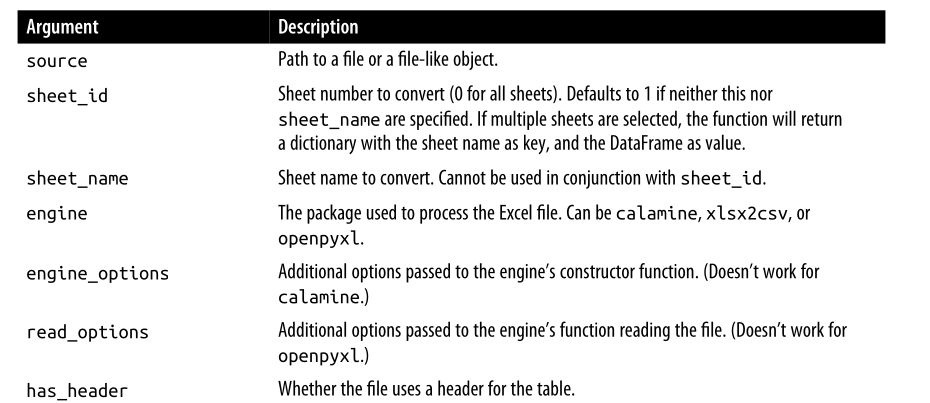


If `pl.read_excel()` does not work you use openpyxl(great for edge cases and general reliablity but maybe slow) or xlsx2csv


## Working with Multiple Files

Use globbing pattern to read multiple files( yeah im not using pyspark just yet xD)

- \* will match anything (0 or more) so  \*.csv will match anything with .csv
- \? will match excatly one char file?.csv will match file1,csv , file2.csv but not file12.csv
- \[ \] will match one charater in the brackets (use it as a range or codex typshii) 

In [27]:
pl.read_csv("data/stock/nvda/201?.csv")

shape: (2_516, 8)
┌────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┬──────────┐
│ symbol ┆ date       ┆ open      ┆ high      ┆ low       ┆ close     ┆ adj close ┆ volume   │
│ ---    ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str    ┆ str        ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ i64      │
╞════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪══════════╡
│ NVDA   ┆ 2010-01-04 ┆ 4.6275    ┆ 4.655     ┆ 4.5275    ┆ 4.6225    ┆ 4.240429  ┆ 80020400 │
│ NVDA   ┆ 2010-01-05 ┆ 4.605     ┆ 4.74      ┆ 4.605     ┆ 4.69      ┆ 4.30235   ┆ 72864800 │
│ NVDA   ┆ 2010-01-06 ┆ 4.6875    ┆ 4.73      ┆ 4.6425    ┆ 4.72      ┆ 4.32987   ┆ 64916800 │
│ NVDA   ┆ 2010-01-07 ┆ 4.695     ┆ 4.715     ┆ 4.5925    ┆ 4.6275    ┆ 4.245015  ┆ 54779200 │
│ NVDA   ┆ 2010-01-08 ┆ 4.59      ┆ 4.67      ┆ 4.5625    ┆ 4.6375    ┆ 4.254189  ┆ 47816800 │
│ …      ┆ …          ┆ …         ┆ …         ┆ …         ┆ …         ┆ …         ┆ …        │
│ NVDA   ┆ 2019-12-24 ┆ 59.549999 ┆ 59.827499 ┆ 59.205002 ┆ 59.654999 ┆ 59.422798 ┆ 13886400 │
│ NVDA   ┆ 2019-12-26 ┆ 59.689999 ┆ 60.080002 ┆ 59.5      ┆ 59.797501 ┆ 59.564739 ┆ 18285200 │
│ NVDA   ┆ 2019-12-27 ┆ 59.950001 ┆ 60.084999 ┆ 58.952499 ┆ 59.217499 ┆ 58.987    ┆ 25464400 │
│ NVDA   ┆ 2019-12-30 ┆ 58.997501 ┆ 59.049999 ┆ 57.764999 ┆ 58.080002 ┆ 57.853928 ┆ 25805600 │
│ NVDA   ┆ 2019-12-31 ┆ 57.724998 ┆ 58.919998 ┆ 57.532501 ┆ 58.825001 ┆ 58.596027 ┆ 23100400 │
└────────┴────────────┴───────────┴───────────┴───────────┴───────────┴───────────┴──────────┘

In [28]:
pl.read_csv("data/stock/**/*.csv") #use two ** because they are located in diff. subdirec.

shape: (18_476, 8)
┌────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬──────────┐
│ symbol ┆ date       ┆ open       ┆ high       ┆ low        ┆ close      ┆ adj close  ┆ volume   │
│ ---    ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---      │
│ str    ┆ str        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64      │
╞════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪══════════╡
│ ASML   ┆ 1999-01-04 ┆ 11.765625  ┆ 12.28125   ┆ 11.765625  ┆ 12.140625  ┆ 7.522523   ┆ 1801867  │
│ ASML   ┆ 1999-01-05 ┆ 11.859375  ┆ 14.25      ┆ 11.71875   ┆ 13.96875   ┆ 8.655257   ┆ 8241600  │
│ ASML   ┆ 1999-01-06 ┆ 14.25      ┆ 17.601563  ┆ 14.203125  ┆ 16.875     ┆ 10.456018  ┆ 16400267 │
│ ASML   ┆ 1999-01-07 ┆ 14.742188  ┆ 17.8125    ┆ 14.53125   ┆ 16.851563  ┆ 10.441495  ┆ 17722133 │
│ ASML   ┆ 1999-01-08 ┆ 16.078125  ┆ 16.289063  ┆ 15.023438  ┆ 15.796875  ┆ 9.787995   ┆ 10696000 │
│ …      ┆ …          ┆ …          ┆ …          ┆ …          ┆ …          ┆ …          ┆ …        │
│ TSM    ┆ 2023-06-26 ┆ 102.019997 ┆ 103.040001 ┆ 100.089996 ┆ 100.110001 ┆ 99.125954  ┆ 8560000  │
│ TSM    ┆ 2023-06-27 ┆ 101.150002 ┆ 102.790001 ┆ 100.019997 ┆ 102.080002 ┆ 101.076591 ┆ 9732000  │
│ TSM    ┆ 2023-06-28 ┆ 100.5      ┆ 101.879997 ┆ 100.220001 ┆ 100.919998 ┆ 99.927986  ┆ 8160900  │
│ TSM    ┆ 2023-06-29 ┆ 101.339996 ┆ 101.519997 ┆ 100.019997 ┆ 100.639999 ┆ 99.650742  ┆ 7383900  │
│ TSM    ┆ 2023-06-30 ┆ 101.400002 ┆ 101.889999 ┆ 100.410004 ┆ 100.919998 ┆ 99.927986  ┆ 11701700 │
└────────┴────────────┴────────────┴────────────┴────────────┴────────────┴────────────┴──────────┘

if you find globbing pattern unreliable then create a list of file names to read and iterate and use `pl.concat()` with `pl.read_csv()`

In [3]:
import calendar
files = [
    f"data/stock/asml/{year}.csv"
    for year in range(1999,2024)
    if calendar.isleap(year)
]
files

['data/stock/asml/2000.csv',
 'data/stock/asml/2004.csv',
 'data/stock/asml/2008.csv',
 'data/stock/asml/2012.csv',
 'data/stock/asml/2016.csv',
 'data/stock/asml/2020.csv']

In [4]:
all_stocks_asml = pl.concat(pl.read_csv(f) for f in files)

## Reading Parquet

Columnar storage used by likes of DuckDB Apache Spark and also \*ting ting ting\* Polars
- Parquet supports nested complex structures but unlike json you don't need to nest and explode and unnest them, easier to use usually saved after the cleaned data, so if you find a parquet file chances are the data is almost already cleaned
- Parquet also includes the schema of the data

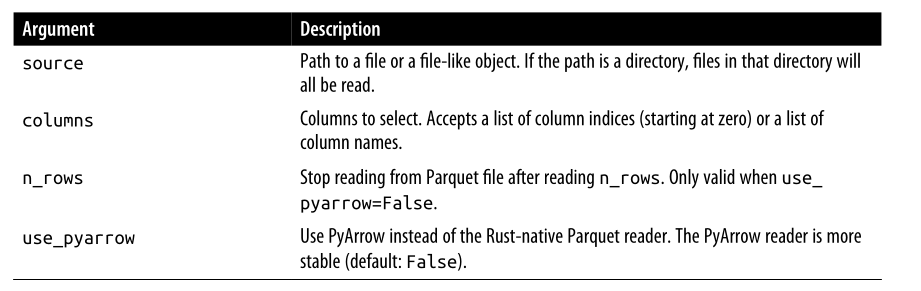


## Reading JSON and NDJSON

### JSON

In [32]:
! cat data/pokedex.json

{
  "pokemon": [{
    "id": 1,
    "num": "001",
    "name": "Bulbasaur",
    "img": "http://www.serebii.net/pokemongo/pokemon/001.png",
    "type": [
      "Grass",
      "Poison"
    ],
    "height": "0.71 m",
    "weight": "6.9 kg",
    "candy": "Bulbasaur Candy",
    "candy_count": 25,
    "egg": "2 km",
    "spawn_chance": 0.69,
    "avg_spawns": 69,
    "spawn_time": "20:00",
    "multipliers": [1.58],
    "weaknesses": [
      "Fire",
      "Ice",
      "Flying",
      "Psychic"
    ],
    "next_evolution": [{
      "num": "002",
      "name": "Ivysaur"
    }, {
      "num": "003",
      "name": "Venusaur"
    }]
  }, {
    "id": 2,
    "num": "002",
    "name": "Ivysaur",
    "img": "http://www.serebii.net/pokemongo/pokemon/002.png",
    "type": [
      "Grass",
      "Poison"
    ],
    "height": "0.99 m",
    "weight": "13.0 kg",
    "candy": "Bulbasaur Candy",
    "candy_count": 100,
    "egg": "Not in Eggs",
    "spawn_chance": 0.042,
    "avg_spawns": 4.2,
    "spawn_time"

In [34]:
pokedex = pl.read_json("data/pokedex.json")
pokedex

shape: (1, 1)
┌─────────────────────────────────┐
│ pokemon                         │
│ ---                             │
│ list[struct[17]]                │
╞═════════════════════════════════╡
│ [{1,"001","Bulbasaur","http://… │
└─────────────────────────────────┘

In [36]:
pokedex.columns #one column

['pokemon']

In [38]:
(
    pokedex.explode("pokemon")
    .unnest("pokemon")
    .columns
)

['id',
 'num',
 'name',
 'img',
 'type',
 'height',
 'weight',
 'candy',
 'candy_count',
 'egg',
 'spawn_chance',
 'avg_spawns',
 'spawn_time',
 'multipliers',
 'weaknesses',
 'next_evolution',
 'prev_evolution']

In [39]:
(
    pokedex.explode("pokemon")
    .unnest("pokemon")
    .select("id","name","type","height","weight")
)

shape: (151, 5)
┌─────┬────────────┬──────────────────────┬────────┬──────────┐
│ id  ┆ name       ┆ type                 ┆ height ┆ weight   │
│ --- ┆ ---        ┆ ---                  ┆ ---    ┆ ---      │
│ i64 ┆ str        ┆ list[str]            ┆ str    ┆ str      │
╞═════╪════════════╪══════════════════════╪════════╪══════════╡
│ 1   ┆ Bulbasaur  ┆ ["Grass", "Poison"]  ┆ 0.71 m ┆ 6.9 kg   │
│ 2   ┆ Ivysaur    ┆ ["Grass", "Poison"]  ┆ 0.99 m ┆ 13.0 kg  │
│ 3   ┆ Venusaur   ┆ ["Grass", "Poison"]  ┆ 2.01 m ┆ 100.0 kg │
│ 4   ┆ Charmander ┆ ["Fire"]             ┆ 0.61 m ┆ 8.5 kg   │
│ 5   ┆ Charmeleon ┆ ["Fire"]             ┆ 1.09 m ┆ 19.0 kg  │
│ …   ┆ …          ┆ …                    ┆ …      ┆ …        │
│ 147 ┆ Dratini    ┆ ["Dragon"]           ┆ 1.80 m ┆ 3.3 kg   │
│ 148 ┆ Dragonair  ┆ ["Dragon"]           ┆ 3.99 m ┆ 16.5 kg  │
│ 149 ┆ Dragonite  ┆ ["Dragon", "Flying"] ┆ 2.21 m ┆ 210.0 kg │
│ 150 ┆ Mewtwo     ┆ ["Psychic"]          ┆ 2.01 m ┆ 122.0 kg │
│ 151 ┆ Mew        ┆ ["Psychic"]          ┆ 0.41 m ┆ 4.0 kg   │
└─────┴────────────┴──────────────────────┴────────┴──────────┘

**`pl.read_json()` args**
- source:Path to a file or a file-like object.<br>
- schema :The DataFrame schema may be declared in several ways. (1) As a dictionary of
{name: type} pairs; if type is None, it will be auto-inferred. (2) As a list
of column names; in this case, types are automatically inferred. (3) As a list of
(name, type) pairs; this is equivalent to the dictionary form.
<br>
- schema_overrides: Support type specification or override one or more columns. Note that any types
inferred from the schema argument will be overridden. Underlying data, the names
given here will overwrite them.

### NDJSON

NDJSON is dataformat for streaming structured data, NewlineDlimiterJSON --> NDJSON

In [40]:
! cat data/wikimedia.ndjson

{"$schema":"/mediawiki/recentchange/1.0.0","meta":{"uri":"https://en.wikipedia.org/wiki/EFL_Championship","request_id":"ea0541fb-4e72-4fc3-82f0-6c26651b2043","id":"0416300b-980c-45bb-b0a2-c9d7a9e2b7eb","dt":"2023-07-29T07:51:39Z","domain":"en.wikipedia.org","stream":"mediawiki.recentchange","topic":"eqiad.mediawiki.recentchange","partition":0,"offset":4820784717},"id":1659529639,"type":"edit","namespace":0,"title":"EFL Championship","title_url":"https://en.wikipedia.org/wiki/EFL_Championship","comment":"/* League champions, runners-up and play-off finalists */","timestamp":1690617099,"user":"87.12.215.232","bot":false,"notify_url":"https://en.wikipedia.org/w/index.php?diff=1167689309&oldid=1166824248","minor":false,"length":{"old":91108,"new":91166},"revision":{"old":1166824248,"new":1167689309},"server_url":"https://en.wikipedia.org","server_name":"en.wikipedia.org","server_script_path":"/w","wiki":"enwiki","parsedcomment":"<span dir=\"auto\"><span class=\"autocomment\"><a href=\"/wik

In [41]:
from json import loads
from pprint import pprint

with open("data/wikimedia.ndjson") as f:
    pprint(loads(f.readline()))



{'$schema': '/mediawiki/recentchange/1.0.0',
 'bot': False,
 'comment': '/* League champions, runners-up and play-off finalists */',
 'id': 1659529639,
 'length': {'new': 91166, 'old': 91108},
 'meta': {'domain': 'en.wikipedia.org',
          'dt': '2023-07-29T07:51:39Z',
          'id': '0416300b-980c-45bb-b0a2-c9d7a9e2b7eb',
          'offset': 4820784717,
          'partition': 0,
          'request_id': 'ea0541fb-4e72-4fc3-82f0-6c26651b2043',
          'stream': 'mediawiki.recentchange',
          'topic': 'eqiad.mediawiki.recentchange',
          'uri': 'https://en.wikipedia.org/wiki/EFL_Championship'},
 'minor': False,
 'namespace': 0,
 'notify_url': 'https://en.wikipedia.org/w/index.php?diff=1167689309&oldid=1166824248',
 'parsedcomment': '<span dir="auto"><span class="autocomment"><a '
                  'href="/wiki/EFL_Championship#League_champions,_runners-up_and_play-off_finalists" '
                  'title="EFL Championship">→\u200eLeague champions, '
                  'ru

In [43]:
wik_data = pl.read_ndjson("data/wikimedia.ndjson")
wik_data

shape: (100, 20)
┌─────────────┬────────────┬────────────┬──────┬───┬────────────┬────────────┬────────┬────────────┐
│ $schema     ┆ meta       ┆ id         ┆ type ┆ … ┆ server_nam ┆ server_scr ┆ wiki   ┆ parsedcomm │
│ ---         ┆ ---        ┆ ---        ┆ ---  ┆   ┆ e          ┆ ipt_path   ┆ ---    ┆ ent        │
│ str         ┆ struct[9]  ┆ i64        ┆ str  ┆   ┆ ---        ┆ ---        ┆ str    ┆ ---        │
│             ┆            ┆            ┆      ┆   ┆ str        ┆ str        ┆        ┆ str        │
╞═════════════╪════════════╪════════════╪══════╪═══╪════════════╪════════════╪════════╪════════════╡
│ /mediawiki/ ┆ {"https:// ┆ 1659529639 ┆ edit ┆ … ┆ en.wikiped ┆ /w         ┆ enwiki ┆ <span dir= │
│ recentchang ┆ en.wikiped ┆            ┆      ┆   ┆ ia.org     ┆            ┆        ┆ "auto"><sp │
│ e/1.0.0     ┆ ia.org/wik ┆            ┆      ┆   ┆            ┆            ┆        ┆ an         │
│             ┆ …          ┆            ┆      ┆   ┆            ┆            ┆        ┆ class="…   │
│ /mediawiki/ ┆ {"https:// ┆ 1659529640 ┆ edit ┆ … ┆ en.wikiped ┆ /w         ┆ enwiki ┆            │
│ recentchang ┆ en.wikiped ┆            ┆      ┆   ┆ ia.org     ┆            ┆        ┆            │
│ e/1.0.0     ┆ ia.org/wik ┆            ┆      ┆   ┆            ┆            ┆        ┆            │
│             ┆ …          ┆            ┆      ┆   ┆            ┆            ┆        ┆            │
│ /mediawiki/ ┆ {"https:// ┆ 1659529642 ┆ edit ┆ … ┆ en.wikiped ┆ /w         ┆ enwiki ┆ <span dir= │
│ recentchang ┆ en.wikiped ┆            ┆      ┆   ┆ ia.org     ┆            ┆        ┆ "auto"><sp │
│ e/1.0.0     ┆ ia.org/wik ┆            ┆      ┆   ┆            ┆            ┆        ┆ an         │
│             ┆ …          ┆            ┆      ┆   ┆            ┆            ┆        ┆ class="…   │
│ /mediawiki/ ┆ {"https:// ┆ 1659529643 ┆ edit ┆ … ┆ en.wikiped ┆ /w         ┆ enwiki ┆ Nominated  │
│ recentchang ┆ en.wikiped ┆            ┆      ┆   ┆ ia.org     ┆            ┆        ┆ for        │
│ e/1.0.0     ┆ ia.org/wik ┆            ┆      ┆   ┆            ┆            ┆        ┆ deletion;  │
│             ┆ …          ┆            ┆      ┆   ┆            ┆            ┆        ┆ see <a…    │
│ /mediawiki/ ┆ {"https:// ┆ 1659529653 ┆ edit ┆ … ┆ en.wikiped ┆ /w         ┆ enwiki ┆ Rescuing 1 │
│ recentchang ┆ en.wikiped ┆            ┆      ┆   ┆ ia.org     ┆            ┆        ┆ sources    │
│ e/1.0.0     ┆ ia.org/wik ┆            ┆      ┆   ┆            ┆            ┆        ┆ and        │
│             ┆ …          ┆            ┆      ┆   ┆            ┆            ┆        ┆ tagging…   │
│ …           ┆ …          ┆ …          ┆ …    ┆ … ┆ …          ┆ …          ┆ …      ┆ …          │
│ /mediawiki/ ┆ {"https:// ┆ 1659529961 ┆ edit ┆ … ┆ en.wikiped ┆ /w         ┆ enwiki ┆ <span dir= │
│ recentchang ┆ en.wikiped ┆            ┆      ┆   ┆ ia.org     ┆            ┆        ┆ "auto"><sp │
│ e/1.0.0     ┆ ia.org/wik ┆            ┆      ┆   ┆            ┆            ┆        ┆ an         │
│             ┆ …          ┆            ┆      ┆   ┆            ┆            ┆        ┆ class="…   │
│ /mediawiki/ ┆ {"https:// ┆ 1659529963 ┆ edit ┆ … ┆ en.wikiped ┆ /w         ┆ enwiki ┆ Ce         │
│ recentchang ┆ en.wikiped ┆            ┆      ┆   ┆ ia.org     ┆            ┆        ┆            │
│ e/1.0.0     ┆ ia.org/wik ┆            ┆      ┆   ┆            ┆            ┆        ┆            │
│             ┆ …          ┆            ┆      ┆   ┆            ┆            ┆        ┆            │
│ /mediawiki/ ┆ {"https:// ┆ 1659529964 ┆ edit ┆ … ┆ en.wikiped ┆ /w         ┆ enwiki ┆            │
│ recentchang ┆ en.wikiped ┆            ┆      ┆   ┆ ia.org     ┆            ┆        ┆            │
│ e/1.0.0     ┆ ia.org/wik ┆            ┆      ┆   ┆            ┆            ┆        ┆            │
│             ┆ …          ┆            ┆      ┆   ┆            ┆            ┆        ┆            │
│ /mediawiki/ ┆ {"https:// ┆ 1659529965 ┆ ed

In [50]:
wik_data.columns

['$schema',
 'meta',
 'id',
 'type',
 'namespace',
 'title',
 'title_url',
 'comment',
 'timestamp',
 'user',
 'bot',
 'notify_url',
 'minor',
 'length',
 'revision',
 'server_url',
 'server_name',
 'server_script_path',
 'wiki',
 'parsedcomment']

In [49]:
(
    wik_data.select("meta").unnest("meta").columns #remaning column as each column should have unique name and while unest meta has 
)

['uri',
 'request_id',
 'id',
 'dt',
 'domain',
 'stream',
 'topic',
 'partition',
 'offset']

In [51]:
(
wik_data.rename({"id": "edit_id"})
.unnest("meta")
.select("timestamp", "title", "user", "comment")
)

shape: (100, 4)
┌────────────┬────────────────────────────┬────────────────────────────┬───────────────────────────┐
│ timestamp  ┆ title                      ┆ user                       ┆ comment                   │
│ ---        ┆ ---                        ┆ ---                        ┆ ---                       │
│ i64        ┆ str                        ┆ str                        ┆ str                       │
╞════════════╪════════════════════════════╪════════════════════════════╪═══════════════════════════╡
│ 1690617099 ┆ EFL Championship           ┆ 87.12.215.232              ┆ /* League champions,      │
│            ┆                            ┆                            ┆ runners-u…                │
│ 1690617102 ┆ Lim Sang-choon             ┆ Preferwiki                 ┆                           │
│ 1690617104 ┆ Higher                     ┆ Ss112                      ┆ /* Albums */ add          │
│ 1690617104 ┆ International Poker Rules  ┆ Piotrus                    ┆ Nominated for deletion;   │
│            ┆                            ┆                            ┆ see [[…                   │
│ 1690617105 ┆ Abdul Hamid Khan Bhashani  ┆ InternetArchiveBot         ┆ Rescuing 1 sources and    │
│            ┆                            ┆                            ┆ tagging…                  │
│ …          ┆ …                          ┆ …                          ┆ …                         │
│ 1690617238 ┆ Havering Residents         ┆ MRSC                       ┆ /* 2018 election */ +map  │
│            ┆ Association                ┆                            ┆                           │
│ 1690617235 ┆ Olha Kharlan               ┆ 2603:7000:2101:AA00:2C88:E ┆ Ce                        │
│            ┆                            ┆ F86:…                      ┆                           │
│ 1690617238 ┆ Mukim Kota Batu            ┆ Pangalau                   ┆                           │
│ 1690617239 ┆ User:IDK1213safasx/sandbox ┆ 94.101.29.27               ┆                           │
│ 1690617234 ┆ List of bus routes in      ┆ Pedroperezhumberto         ┆ /* Non-TfL bus routes in  │
│            ┆ London                     ┆                            ┆ Great…                    │
└────────────┴────────────────────────────┴────────────────────────────┴───────────────────────────┘

## Other File Formats

Did you know pandas can read tables from html directly , like all of them and saves each of them and you can index them. Man if i knew this in TDS i would've aced it xD ahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh

In [1]:
%pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import requests

url = 'https://en.wikipedia.org/wiki/List_of_Latin_abbreviations' # Replace with the actual URL

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}
response = requests.get(url, headers=headers)

In [6]:
try:
    import pandas as pd
    url = "https://en.wikipedia.org/wiki/List_of_Latin_abbreviations"
    pl.from_pandas(pd.read_html(url)[0])
except Exception as e:
    print(e)

HTTP Error 403: Forbidden


## Querying Databases

`pl.read_database()`

In [9]:
%pip install connectorx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 31.5 MB/s  0:00:01m0:00:0100:01
Note: you may need to restart the kernel to use updated packages.


Polars supports retrieving data from
various relational databases, including Postgres, MS SQL, MySQL, Oracle, SQLite,
and BigQuery

In [7]:
Query = """
SELECT
    f.film_id,
    f.title,
    c.name AS category,
    f.rating,
    f.length / 60.0 AS length
FROM
    film as f,
    film_category AS fc,
    category as c

WHERE 
    fc.film_id = f.film_id
    AND fc.category_id = c.category_id
LIMIT 10
"""


In [10]:
pl.read_database_uri(
    query=Query,
    uri="sqlite:::data/sakila.db"
)

shape: (10, 5)
┌─────────┬──────────────────┬─────────────┬────────┬──────────┐
│ film_id ┆ title            ┆ category    ┆ rating ┆ length   │
│ ---     ┆ ---              ┆ ---         ┆ ---    ┆ ---      │
│ i64     ┆ str              ┆ str         ┆ str    ┆ f64      │
╞═════════╪══════════════════╪═════════════╪════════╪══════════╡
│ 1       ┆ ACADEMY DINOSAUR ┆ Documentary ┆ PG     ┆ 1.433333 │
│ 2       ┆ ACE GOLDFINGER   ┆ Horror      ┆ G      ┆ 0.8      │
│ 3       ┆ ADAPTATION HOLES ┆ Documentary ┆ NC-17  ┆ 0.833333 │
│ 4       ┆ AFFAIR PREJUDICE ┆ Horror      ┆ G      ┆ 1.95     │
│ 5       ┆ AFRICAN EGG      ┆ Family      ┆ G      ┆ 2.166667 │
│ 6       ┆ AGENT TRUMAN     ┆ Foreign     ┆ PG     ┆ 2.816667 │
│ 7       ┆ AIRPLANE SIERRA  ┆ Comedy      ┆ PG-13  ┆ 1.033333 │
│ 8       ┆ AIRPORT POLLOCK  ┆ Horror      ┆ R      ┆ 0.9      │
│ 9       ┆ ALABAMA DEVIL    ┆ Horror      ┆ PG-13  ┆ 1.9      │
│ 10      ┆ ALADDIN CALENDAR ┆ Sports      ┆ NC-17  ┆ 1.05     │
└─────────┴──────────────────┴─────────────┴────────┴──────────┘

We can use polars for the data querying but is comparitively expensive, so let the db instuctions(sql) do most of joins etc before exporting/importing to polars

In [11]:
db = "sqlite:::data/sakila.db"
films = pl.read_database_uri("SELECT * FROM film",db)

In [12]:
film_categories = pl.read_database_uri("SELECT * FROM film_category",db)
categories = pl.read_database_uri("SELECT * FROM category",db)

In [14]:
(
    films.join(film_categories, on="film_id", suffix="_fc")
    .join(categories,on="category_id", suffix="_c")
    .select(
        "film_id",
        "title",
        pl.col("name").alias("category"),
        "rating",
        pl.col("length") / 60,
    )
    .limit(10)
)

shape: (10, 5)
┌─────────┬──────────────────┬─────────────┬────────┬──────────┐
│ film_id ┆ title            ┆ category    ┆ rating ┆ length   │
│ ---     ┆ ---              ┆ ---         ┆ ---    ┆ ---      │
│ i64     ┆ str              ┆ str         ┆ str    ┆ f64      │
╞═════════╪══════════════════╪═════════════╪════════╪══════════╡
│ 1       ┆ ACADEMY DINOSAUR ┆ Documentary ┆ PG     ┆ 1.433333 │
│ 2       ┆ ACE GOLDFINGER   ┆ Horror      ┆ G      ┆ 0.8      │
│ 3       ┆ ADAPTATION HOLES ┆ Documentary ┆ NC-17  ┆ 0.833333 │
│ 4       ┆ AFFAIR PREJUDICE ┆ Horror      ┆ G      ┆ 1.95     │
│ 5       ┆ AFRICAN EGG      ┆ Family      ┆ G      ┆ 2.166667 │
│ 6       ┆ AGENT TRUMAN     ┆ Foreign     ┆ PG     ┆ 2.816667 │
│ 7       ┆ AIRPLANE SIERRA  ┆ Comedy      ┆ PG-13  ┆ 1.033333 │
│ 8       ┆ AIRPORT POLLOCK  ┆ Horror      ┆ R      ┆ 0.9      │
│ 9       ┆ ALABAMA DEVIL    ┆ Horror      ┆ PG-13  ┆ 1.9      │
│ 10      ┆ ALADDIN CALENDAR ┆ Sports      ┆ NC-17  ┆ 1.05     │
└─────────┴──────────────────┴─────────────┴────────┴──────────┘

## Writing Data

### CSV

In [20]:
all_stocks_asml.write_csv("data/all_stocks_asml.csv")

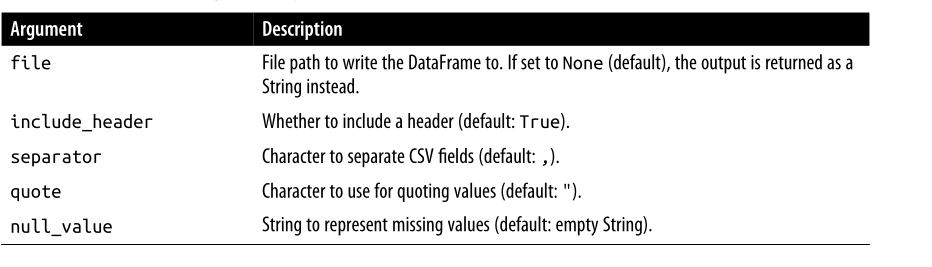


### EXCEL

In [6]:
%pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [7]:
all_stocks_asml.write_excel("data/all_stocks.xlsx")

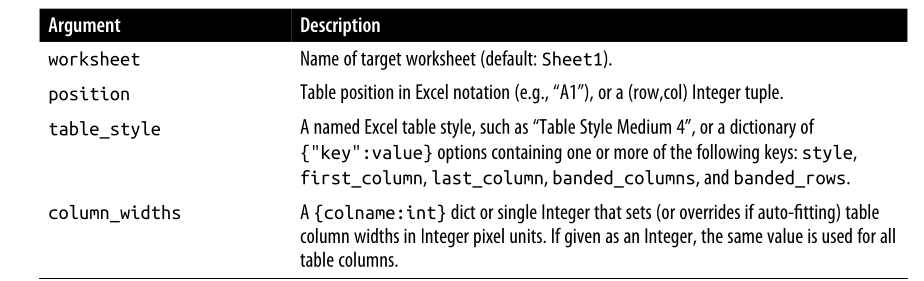


### Parquet

In [9]:
all_stocks_asml.write_parquet("data/all_stocks_asml.parquet")

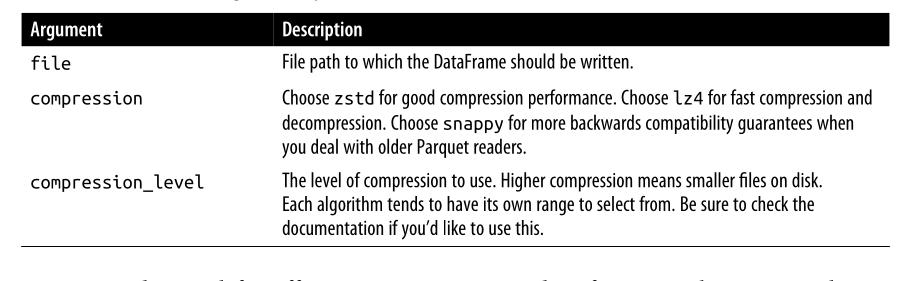


### OTHER

Supports somthing called Avro (*Avro is a row-oriented remote procedure call and data serialization framework developed within Apache's Hadoop project. It uses JSON for defining data types and protocols, and serializes data in a compact binary format.*)
and also JSON

## Recap

- There are bunch of read and write options, mainly csv, parquet, xlsw, and even db and json
- csv files note the encoding and delimter , rest are standard(missing values , headers etc are standard Data Analyst shizz that trial and error)
- use openpyxl engine if all else fails (xlsx2csv )
- parquet nuff said
- json, check scheme, explode and unnest columns
- ndjson, line wise so kinda easier, but you have to explore data, once you get a hang of it is easy
- `pd.read_html(url)` for reading html tables in html pages. That's crazy xD
- DB:
    - genreally connection string needs username::password and even port, so use sqllite, when you need to master DB Shizz you can worry about that. but you should asap lol
    - also when queryinh always make sure the db does expensive operations as needed insteaded of porting data into python env and then doing joins, way more expensive
- Wrting data, standard, just need to have xlsw and other writers(pyarrow for parquet)



# EXPRESS

# Chapter 7

## Methods and Namespaces

There are about 350 methods at the time of writing(not even publishing) for Polars Expressions

## Expressions by Examples

###  Selecting Columns By Expressions
`df.select()`

### Creating New Columns With Expressions
`df.with_columns()`

### Filtering Rows with Expressions
`df.filter()`

### Aggregating with Expressions
`df.groupby()`

Expressions are executed in parallel which makes it faster than a tradional approach

### Sorting Rows with expressions
`df.sort()`

You can sort rows based with expression for use cases, like in pandas with lambda with here it uses in-built expressions ie pl.col()

## WHat is an Expression? Define.

### Properties of Expressions

They are :
- Lazy
- Function and data dependent
- Reusable
- Expressive
- Efficient 

## Creating Expressions

### From Existing Columns
Number of ways to select columns with df.select(Expr)
- from col name
- regex
- data type : `.select(pl.col(pl.DType))`
- even a list of columns


### From Literal Values
`pl.lit()`
Used to create a new expression based on someother python value

### From Ranges

**Functions for creating Ranges**

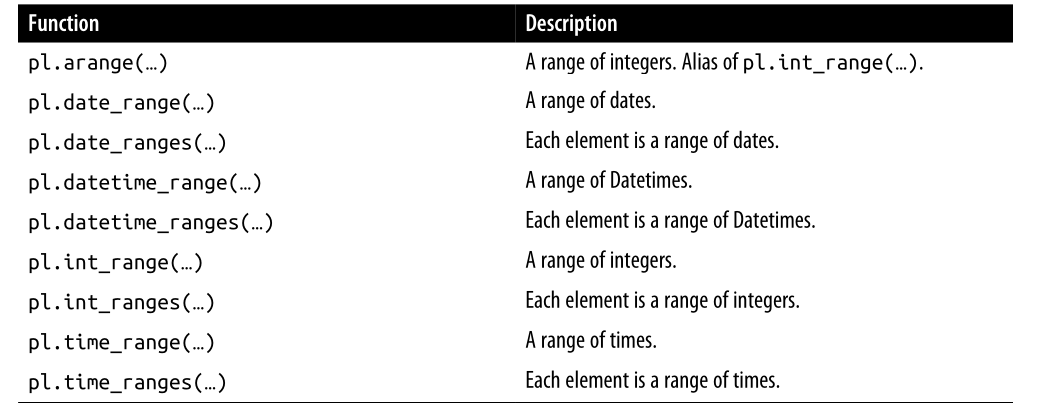


### Other Functions to Create Expressions

- `pl.len()`
- `pl.element()` used in combination with `Expr.list.eval()`

## Renaming Expressions

Why tho?
- avoid duplicate names
- clean up column names
- change column names
- give a better name or express the column

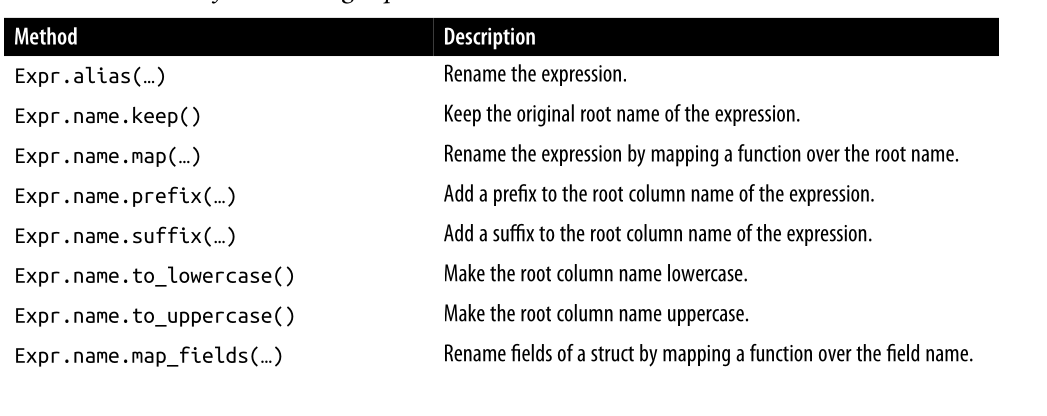

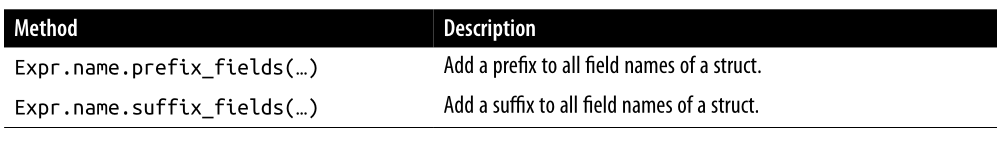


**Danger** : At time of writing, polars only supports one name operation. ie `Expr.name`
So `Expr.name.map(lambda s: *list of chained operations*)

## Expressions are Idiomatic
Meaning they are inherent and come natually to a seasoned data analyst
Like when you filter with conidtions and other cond. is present the rows of df don't match. something i've ran into multiple times in pandas, and it makes code run sub optimally. Wheras chaining expressions, mainly optimizes code and also catches errors before expensive operations(Dtype) but row mismatch cause lazy doen't get the num. of rows. anyways being lazy pays off lol

## Recaps

# Chapter 8

This Block is more of a deep dive into expressions and see how to 
- Perform mathematical transformations
- Work with missing values
- Apply smoothing values
- Select specific values
- Summarize values using Statistics

Will use `numpy` and `math` for random and constants(pi)

In [3]:
import math
import numpy as np

print(math.pi)
rng = np.random.default_rng(1738) #yeeaaaah baby 1738, I'm like hey wassup hello.......
print(rng.random())

3.141592653589793
0.8164156912801321


## Types of Operations


**Types of Operations**

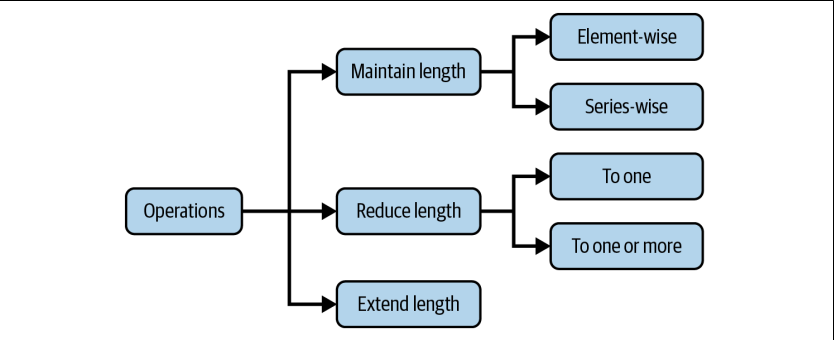


`Expr.unique()` and `Expr.is_unique()` one reduces length one does not, clearly one is just checking is unique?


### Element Wise Operations

### Operations that summarize into one

### Operations that summarize into one or more

### Operations that extend

## Element Wise

transforms one element at a time. Eg: `Expr.sqrt()` 

### Operations that Perform Mathematical Transformatiosn

- `Expr.abs()` Compute absolute values.)
- `Expr.cbrt()` Compute the cube root of the elements.
- `Expr.exp()` Compute the exponential, element-wise.
- `Expr.log(…)`Compute the logarithm to a given base.
- `Expr.log10()`Compute the base 10 logarithm of the input array, element-wise.
- `Expr.log1p()`Compute the natural logarithm of each element plus one.
- `Expr.sign()`Compute the element-wise indication of the sign.
- `Expr.sqrt()`Compute the square root of the elements.

### Operations Related to Trigonometry

- `Expr.arccos()`Compute the element-wise value for the inverse cosine.
- `Expr.arccosh()`Compute the element-wise value for the inverse hyperbolic cosine.
- `Expr.arcsin()`Compute the element-wise value for the inverse sine.
- `Expr.arcsinh()`Compute the element-wise value for the inverse hyperbolic sine.
- `Expr.arctan()`Compute the element-wise value for the inverse tangent.
- `Expr.arctanh()`Compute the element-wise value for the inverse hyperbolic tangent.
- `Expr.cos()`Compute the element-wise value for the cosine.
- `Expr.cosh()`Compute the element-wise value for the hyperbolic cosine.
- `Expr.degrees()`Convert from radians to degrees.
- `Expr.radians()`Convert from degrees to radians.
- `Expr.sin()`Compute the element-wise value for the sine.
- `Expr.sinh()`Compute the element-wise value for the hyperbolic sine.
- `Expr.tan()`Compute the element-wise value for the tangent.
- `Expr.tanh()`Compute the element-wise value for the hyperbolic tangent.

### Operations that Round and Categorize 
BINNING TYPSHI

- `Expr.ceil()  `Round up to the nearest integer value.
- `Expr.clip(…) `Clip (limit) the values in an array to a min and max boundary.
- `Expr.cut(…)  `Cut continuous values into discrete categories.
- `Expr.floor() `Round down to the nearest integer value.
- `Expr.qcut(…) `Cut continuous values into discrete categories based on their quantiles.
- `Expr.round(…)` Round underlying floating-point data by decimal digits.

### Operations for Missing or Infinite Values

- `Expr.fill_nan(…)  `Fill floating-point NaN value with a fill value.
- `Expr.fill_null(…) `Fill null values using the specified value or strategy.
- `Expr.is_finite()  `Return a Boolean Series indicating which values are finite.
- `Expr.is_infinite()`Return a Boolean Series indicating which values are infinite.
- `Expr.is_nan()     `Return a Boolean Series indicating which values are NaN.
- `Expr.is_not_nan() `Return a Boolean Series indicating which values are not NaN.
- `Expr.is_not_null()`Return a Boolean Series indicating which values are not null.
- `Expr.is_null()    `Return a Boolean Series indicating which values are null.

Also Remember NaN and null are not the same, Null also is `None` but NaN can be `math.nan` etc you can use `Expr.nan()` or  `Expr.is_null()`

### Other Operations

- `Expr.replace(…)  `Replace values in column according to remapping dictionary.
- `Expr.hash(…)     `Hash the elements in the selection. 
- `Expr.repeat_by(…)`Repeat the elements in this Series as specified in the given expression.

## Non Reducing Series Wise Operations

Basically $ Operation(Series) --> New Series $ `Expr.cum_sum()` `Expr.forward_fill()`

### Operations that accumulate

 - `Expr.cum_count(…) `Get an array with the cumulative count computed at every element.
 - `Expr.cum_max(…)   `Get an array with the cumulative max computed at every element.
 - `Expr.cum_min(…)   `Get an array with the cumulative min computed at every element.
 - `Expr.cum_prod(…)  `Get an array with the cumulative product computed at every element.
 - `Expr.cum_sum(…)   `Get an array with the cumulative sum computed at every element.
 - `Expr.diff(…)      `Calculate the nth discrete difference.
 - `Expr.pct_change(…)`Compute percentage change between values.

### Operations That Fill and Shift

Filling data(the columns) with the rows near it for a specific value

- `Expr.shift(…)         `Shift the values by a given period
- `Expr.backward_fill(…) `Fill missing values with the next to-be-seen value.
- `Expr.forward_fill(…  )`Fill missing values with the latest seen value.
- `Expr.interpolate(…)   `Fill missing values using interpolation.

Difference in interpolation methods.

### Operations Related to duplicated Values

- `Expr.is_duplicated()    ` Get a Boolean Series that indicates which values are duplicated.
- `Expr.is_first_distinct()` Get a Boolean Series that indicates which values are first unique.
- `Expr.is_last_distinct() ` Get a Boolean Series that indicates which values are last unique.
- `Expr.is_unique()        ` Get a Boolean Series that indicates which values are unique.

### Operations that compute rolling statistics

analyses pg 168. analysis

- rolling min and max with visualization shows a nice picture on actual growth of a stock and not the intermediate ups and downs


- `Expr.ewm_mean(…)        ` Exponentially weighted moving average.
- `Expr.ewm_std(…)         ` Exponentially weighted moving standard deviation.
- `Expr.ewm_var(…)         ` Exponentially weighted moving variance.
- `Expr.rolling_apply(…)   ` Apply a custom rolling window function.
- `Expr.rolling_map(…)     ` Compute a custom rolling window function.
- `Expr.rolling_max(…)     ` Apply a rolling max (moving max) over the values in this array.
- `Expr.rolling_mean(…)    ` Apply a rolling mean (moving mean) over the values in this array.
- `Expr.rolling_median(…)  ` Compute a rolling median.
- `Expr.rolling_min(…)     ` Apply a rolling min (moving min) over the values in this array.
- `Expr.rolling_quantile(…)` Compute a rolling quantile.
- `Expr.rolling_skew(…)    ` Compute a rolling skew.
- `Expr.rolling_std(…)     ` Compute a rolling standard deviation.
- `Expr.rolling_sum(…)     ` Apply a rolling sum (moving sum) over the values in this array.
- `Expr.rolling_var(…)     ` Compute a rolling variance.

`ignore_nulls = True` to handle missing stock price

### Operations That Sort

- `Expr.arg_sort(…)`  Get the index values that would sort this column.
- `Expr.shuffle(…) `  Shuffle the contents of this expression.
- `Expr.sort(…)    `  Sort this column.
- `Expr.reverse()  `  Reverse the selection.
- `Expr.sort_by(…) `  Sort this column by the ordering of other columns.
- `Expr.rank(…)    `  Assign ranks to data, dealing with ties appropriately.

soring should sort the entire row uses the pointer index, else the data becomes not data. So........ idk if this just sorts just the columm (not really) but Chp 11 will come to the rescue
<br> Also sort_by does sort only the column AYOO WTF?

### Other Operations

Non reducing Series-wise Operator that basically genreates index 

`Expr.rle_id() `Get a distinct Integer ID for each run of identical values. The ID starts at 0 and
increases by one each time the value of the column changes.

###

## Series-Wise That Summarize to One 

Repeated Values
- If you are not `group_by().agg()` and jsut `Expr.mean()` etc  and keep the original values then it will create a new column with the same repeated value, here the mean of the `Expr.mean()`

- `Expr.all(…)`  Returns whether all values in the column are True.
- `Expr.any(…)`  Return whether any of the values in the column are True.

### Operations That are Quantifiers

**Quantifiers** : Turn Boolean values into one value

### Operations That compute statistics

- `Expr.entropy(…) ` :Compute the entropy.
- `Expr.kurtosis(…)` :Compute the kurtosis (Fisher or Pearson) of a dataset.
- `Expr.max()      ` :Get maximum value.
- `Expr.mean()     ` :Get mean value.
- `Expr.median()   ` :Get median value using linear interpolation.
- `Expr.min()      ` :Get minimum value.
- `Expr.nan_max()  ` :Get maximum value, but propagate/poison encountered NaN values.
- `Expr.nan_min()  ` :Get minimum value, but propagate/poison encountered NaN values.
- `Expr.product()  ` :Compute the product of an expression.
- `Expr.quantile(…)` :Get quantile value.
- `Expr.skew(…)    ` :Compute the sample skewness of a dataset.
- `Expr.std(…)     ` :Get standard deviation.
- `Expr.sum()      ` :Get sum value.
- `Expr.var(…)     ` :Get variance.

### Operations That Count

- `Expr.approx_n_unique()` Approximate count of unique values. HyperLoglog ++ so idk loglog is fast xD
- `Expr.count()          ` Count the number of values in this expression.
- `Expr.len()            ` Count the number of values in this expression.
- `Expr.n_unique()       ` Count unique values.
- `Expr.null_count()     ` Count null values.

### Other Operations

- `Expr.arg_max()    `: Get the index of the maximal value.
- `Expr.arg_min()    `: Get the index of the minimal value.
- `Expr.first()      `: Get the first value.
- `Expr.get(…)       `: Return a single value by index.
- `Expr.implode()    `: Aggregate values into a list.
- `Expr.last()       `: Get the last value.
- `Expr.lower_bound()`: Calculate the lower bound.
- `Expr.upper_bound()`: Calculate the upper bound.

## Series Wise That Summarize to One or MORE

Depends on the values themselves and not a standard output but what you get is what you put in

### Operations Related to Unique Values

- `Expr.arg_unique()    `Get index of first unique value.
- `Expr.unique(…)       `Get unique values of this expression.
- `Expr.unique_counts() `Return a count of the unique values in the order of appearance.
- `Expr.value_counts(…) `Count the occurrences of unique values.

### Operations That Select

- `Expr.bottom_k(…)     `:Return the k smallest elements.
- `Expr.head(…)         `:Get the first n rows.
- `Expr.limit(…)        `:Get the first n rows (alias for Expr.head()).
- `Expr.sample(…)       `:Sample from this expression.
- `Expr.slice(…)        `:Get a slice of this expression.
- `Expr.tail(…)         `:Get the last n rows.
- `Expr.gather(…)       `:Take values by index.
- `Expr.gather_every(…) `:Take every nth value in the Series and return as a new Series. Has to match height else height don't match
- `Expr.top_k(…)        `:Return the k largest elements.

### Operations That Drop Missing Values

- `Expr.drop_nans() `:Drop floating-point NaN values.
- `Expr.drop_nulls()`:Drop all null values.

### Other Operations

- `Expr.arg_true()      ` :Return indices where expression evaluates to True.
- `Expr.flatten()       ` :Flatten a list or String column.
- `Expr.mode()          ` :Compute the most occurring value(s).
- `Expr.reshape(…)      ` :Reshape this Expr to a flat Series or a Series of lists.
- `Expr.rle()           ` :Get the lengths of runs of identical values.
- `Expr.search_sorted(…)` :Find indices where elements should be inserted to maintain order

## Series Operations That Extend

- `Expr.explode()         `Explode a list expression.
- `Expr.extend_constant(…)`Extend the Series with a constant value.

## Recap

Do after Code

# Chapter 9

# Chapter 10

# Chapter 11

# Chapter 12

# Chapter 13

# Chapter 14

# Chapter 15